In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Overview
___

Aquest dataset pertany al repositori de Machine Learningn UC Irvine. Es va publicar el 3/3/2024 i s'ha fet emfasí en integrar les URL més recents, i així reflectir les tendències actuals.
Consisteix en un conjunt de URL's i els seus atributs, juntament amb una etiqueta de si és un link fraudulent o no (0: phishing, 1: legítim).

Per construir-lo la majoria d'URLs s'han extret de Phishtank

Analitzem-lo per sobre:


In [32]:
data = pd.read_csv('data/dataset.csv')

In [33]:
data.head(1)

,FILENAME,URL,Domain,TLD,LineOfCode,LargestLineLength,HasTitle,Title,HasFavicon,Robots,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0,1,...,0,0,1,34,20,28,119,0,124,1


In [34]:
data.shape

(235796, 32)

In [35]:
data.columns

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],
      dtype='object')

In [36]:
# Count number of numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Count number of non-numerical columns
non_numerical_columns = data.select_dtypes(exclude=[np.number]).columns

# Print the number of numerical and non-numerical columns
print('Numerical_columns:', len(numerical_columns))
print('Non_numerical_columns:', len(non_numerical_columns))

Numerical_columns: 27
Non_numerical_columns: 5


___
Tenim un total de 32 features. 27 numériques i 5 nominals.

Veiem que conté features relacionades amb el contingut HTML de la pagina web:

- **HTML features (28):** 

    Aqui
    <details open>
    <summary>Mostrar Atributs:</summary>
    - IsHTTPS: Indica si la pàgina utilitza el protocol HTTPS (segur) per a la comunicació.
    - LineOfCode: Nombre total de línies de codi en el fitxer HTML de la pàgina.
    - LargestLineLength: Longitud de la línia més llarga de codi HTML.
    - HasTitle: Indica si la  pàgina web té un títol en la etiqueta <title>.
    - Title: El títol definit a la etiqueta <title> de la pàgina web.
    ...
    -  Pay: Indica si la pàgina està relacionada amb pagaments en línia.
    - Crypto: Indica si la pàgina està associada amb criptomonedes.
    - HasCopyrightInfo: Indica si la pàgina inclou informació sobre drets d'autor.
    - NoOfImage: Nombre d'imatges presents a la pàgina web.
    - NoOfCSS: Nombre de fulls d'estil CSS referenciats a la pàgina.
    - NoOfJS: Nombre de fitxers JavaScript carregats a la pàgina.
    - NoOfSelfRef: Nombre d'enllaços que redirigeixen a la mateixa pàgina.
    - NoOfEmptyRef: Nombre d'enllaços sense URL definida (enllaços buits).
    - NoOfExternalRef: Nombre d'enllaços que apunten a dominis externs
    </details>

Ara verifiquem que el dataset no inclou Null/Nans/Missing values:

In [37]:
# Check for missing values or NaNs
missing = data.isnull().sum()
missing = missing[missing > 0]
print(len(missing), 'columns with missing values')

0 columns with missing values


---
El nostre dataset conté un gran numero d'instancies i atributs. (235795 URLs i 56 característiques). A primera vista, la gran majoria d'aquestes dades poden ser aprofitades ja que no tenim Missing Values ni NaN's al dataset. Tot i així caldrà verificar si hi ha redundancies, com per exemple, si hi ha instancies duplicades, o si hi ha informació incorrecte. 

El que realitzarem ara són comprovacions sobre si les dades que tenim són valides i representatives del problema de les URL sobre phishing.


## Exploratory data analysis
___

En aquest apartat realitzarem una inspecció més detallada del nostre conjunt de dades. En especial ens interessa trobar patrons que caracteritzin cadascuna de les dues clases que volem estudiar (1: Legitima, 0: Phishing). 

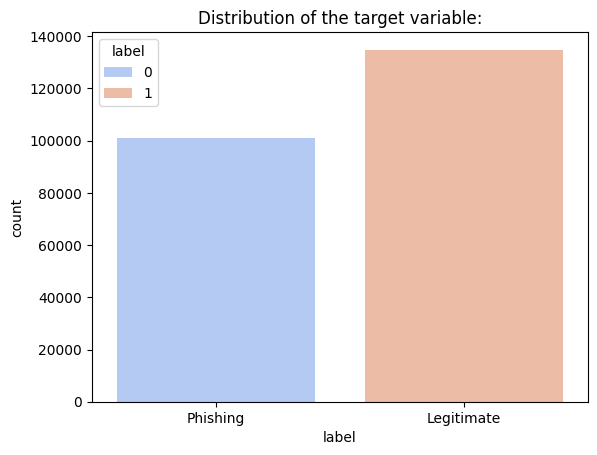

In [38]:
# Plot the distribution of the target variable
sns.countplot(x='label', hue='label', data=data, palette='coolwarm')
plt.title('Distribution of the target variable:')
plt.xticks([0, 1], ['Phishing', 'Legitimate'])
plt.show()


**Tenim 100945 URL's falses i 134850 legítimes.** Es força equilibrat donada la quantitat de instancies de cada classe. Tot i així tindrem en compte aquesta lleugera diferencia posteriorment.

Primerament, intentarem veure si existeix una separació trivial entre la classe 0 i classe 1 considerant els atributs HTML. Farem  una projecció amb 2 components del nostre conjunt mitjançant PCA. 

Number of rows before removing outliers: 235796
Number of rows after removing outliers: 175056


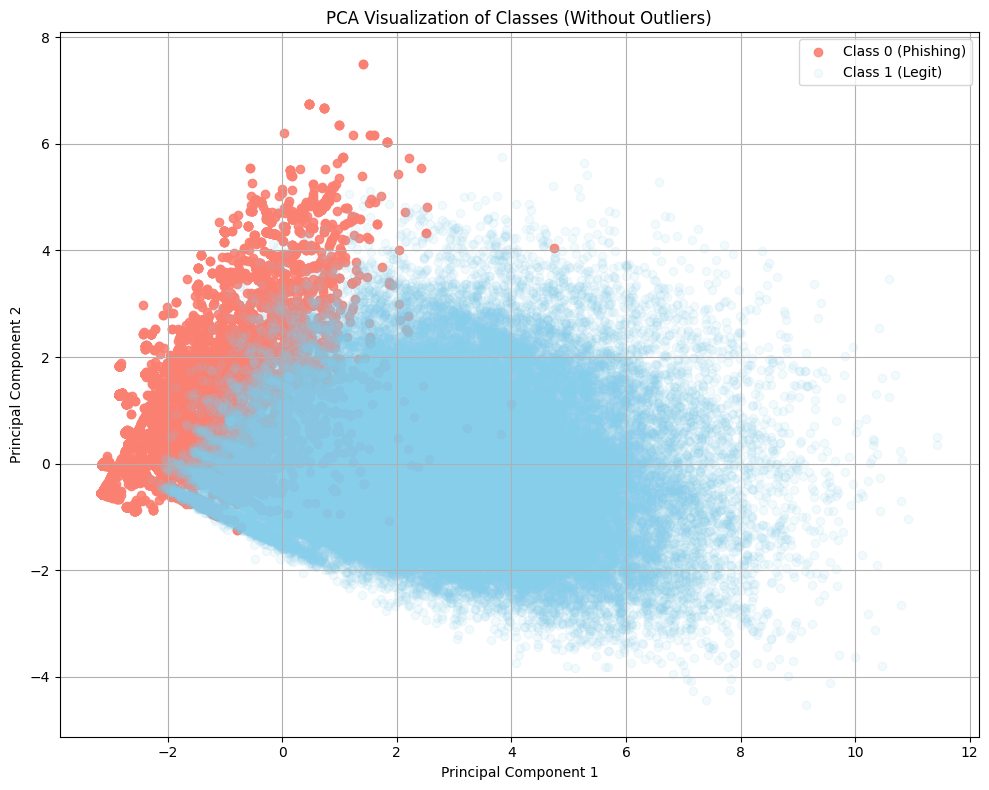

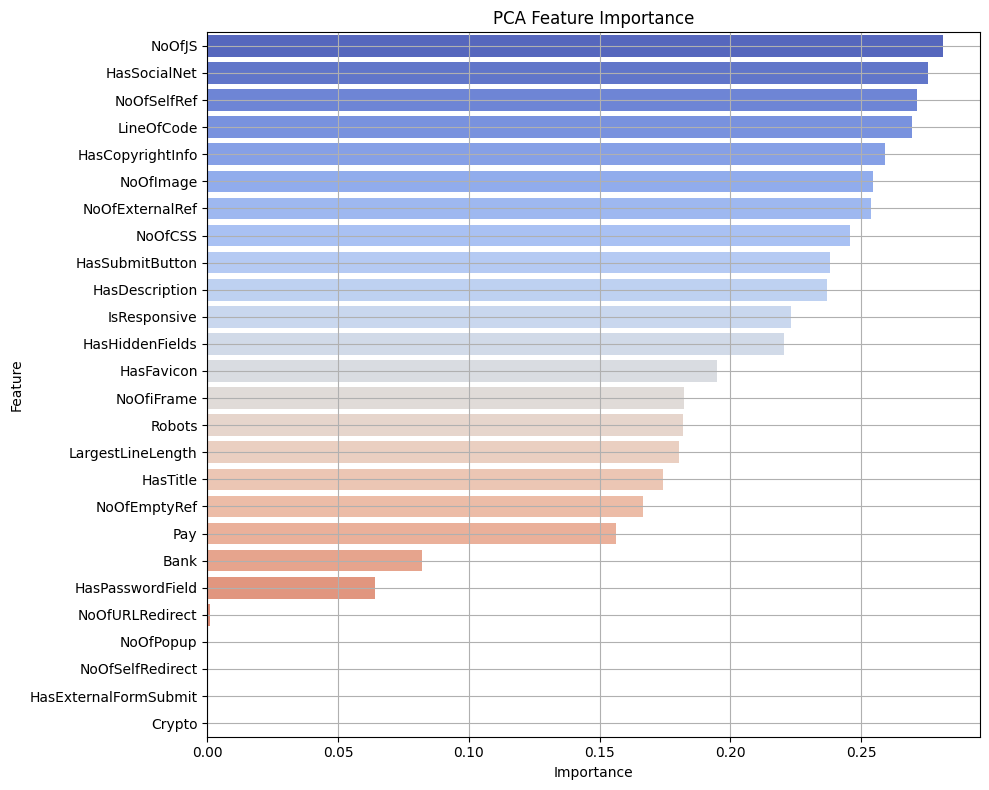

                  Feature    Importance
22                 NoOfJS  2.814241e-01
12           HasSocialNet  2.757607e-01
23            NoOfSelfRef  2.714420e-01
0              LineOfCode  2.694236e-01
19       HasCopyrightInfo  2.591800e-01
20              NoOfImage  2.546833e-01
25        NoOfExternalRef  2.539177e-01
21                NoOfCSS  2.459023e-01
13        HasSubmitButton  2.380919e-01
8          HasDescription  2.370092e-01
5            IsResponsive  2.233742e-01
14        HasHiddenFields  2.204772e-01
3              HasFavicon  1.947265e-01
10             NoOfiFrame  1.820948e-01
4                  Robots  1.817542e-01
1       LargestLineLength  1.805099e-01
2                HasTitle  1.743375e-01
24           NoOfEmptyRef  1.667804e-01
17                    Pay  1.562479e-01
16                   Bank  8.190361e-02
15       HasPasswordField  6.412751e-02
6         NoOfURLRedirect  8.657751e-04
9               NoOfPopup  4.038968e-28
7        NoOfSelfRedirect  0.000000e+00


In [39]:
# Perform a PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Select only numerical columns of HTML, selecting everything except the target 'label'
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_features = numerical_features[numerical_features != 'label']

# Step 2: Remove Outliers using the IQR method, for visualization purposes
Q1 = data[numerical_features].quantile(0.1)
Q3 = data[numerical_features].quantile(0.9)
IQR = Q3 - Q1

# Keep rows within 1.5*IQR
data_no_outliers = data[
    ~((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
]

print('Number of rows before removing outliers:', data.shape[0])
print('Number of rows after removing outliers:', data_no_outliers.shape[0])

# Step 3: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_no_outliers[numerical_features])

# Extract the target labels
y = data_no_outliers['label'].values

# Step 4: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Visualize the Results with Transparency
plt.figure(figsize=(10, 8))
plt.scatter(
    X_pca[y == 0, 0], X_pca[y == 0, 1],
    alpha=0.9, label='Class 0 (Phishing)', c='salmon'
)
plt.scatter(
    X_pca[y == 1, 0], X_pca[y == 1, 1],
    alpha=0.1, label='Class 1 (Legit)', c='skyblue'
)
plt.title('PCA Visualization of Classes (Without Outliers)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Most important features
importances = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': np.abs(pca.components_[0])
})
importances = importances.sort_values('Importance', ascending=False)

# Plot the most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances, palette='coolwarm', hue='Feature', legend=False)
plt.title('PCA Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

#print importances
print(importances)

In [40]:
# Show the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
print('Total Explained Variance:', np.sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.36551539 0.05772396]
Total Explained Variance: 0.42323934164623617


**Aquest primer anàlisi ens aporta molta informació:**

- El scatterplot indica una lleugera separació entre la clase phishing i legítima. Tot i així, existeix una regió de solapament, cosa que suggereix que hi han certes caracterisiques que comparteixen ambdues classes. 


La observació clau aquí és que, totes les features amb major contribució a la variança de les components principals tracten sobre **que tan treballada** és la pàgina web. Això té sentit ja que les pagines legítimes inclouen molt més esforços i recursos per tant, tenen una major variablilitat en aquest sentit. En comparació, les pagines web de phishing solen tenir un contingut molt poc elaborat, i per tant menys variabilitat pel que fa als recursos de disseny per construirla. 

Finalment, notem que amb dues components expliquem només el 42% de la variança.
___

Seguint amb el punt anterior, cal recordar que PCA classifica les característiques en funció de la seva contribució a explicar la variància general del conjunt de dades, que pot no estar directament relacionada amb la seva capacitat per separar classes. Degut a això i el tipus de separació, realitzarem un Linear Discriminant Analysis (LDA), un metode que sí es supervisat. 




Number of rows before removing outliers: 235796
Number of rows after removing outliers: 220634


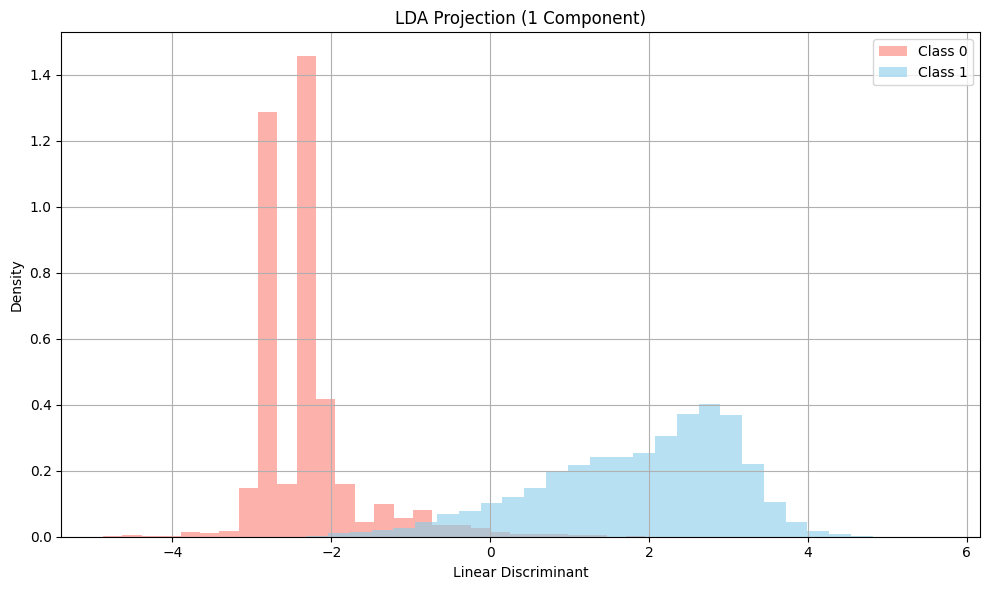

C:\Users\aiman\AppData\Local\Temp\ipykernel_28228\1325063380.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=lda_importances, palette='coolwarm')


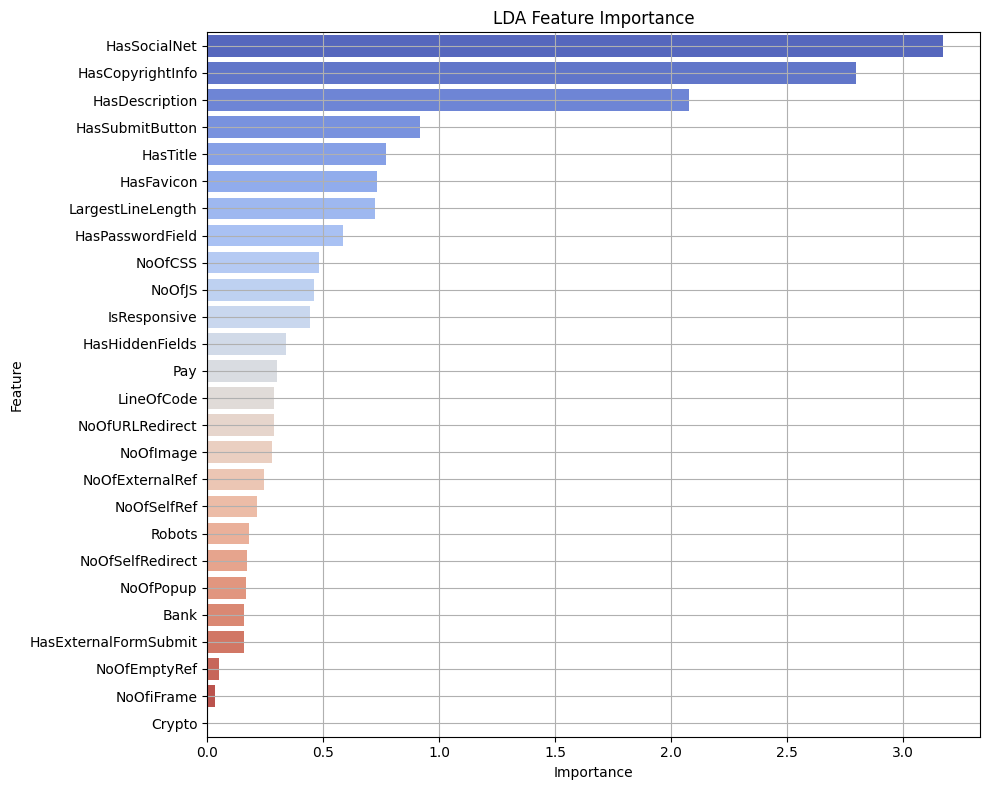

                  Feature    Importance
12           HasSocialNet  3.174664e+00
19       HasCopyrightInfo  2.797899e+00
8          HasDescription  2.078632e+00
13        HasSubmitButton  9.165235e-01
2                HasTitle  7.691637e-01
3              HasFavicon  7.322526e-01
1       LargestLineLength  7.240962e-01
15       HasPasswordField  5.839708e-01
21                NoOfCSS  4.804599e-01
22                 NoOfJS  4.586242e-01
5            IsResponsive  4.410245e-01
14        HasHiddenFields  3.396285e-01
17                    Pay  2.990462e-01
0              LineOfCode  2.886517e-01
6         NoOfURLRedirect  2.875876e-01
20              NoOfImage  2.795343e-01
25        NoOfExternalRef  2.435924e-01
23            NoOfSelfRef  2.139254e-01
4                  Robots  1.795902e-01
7        NoOfSelfRedirect  1.702847e-01
9               NoOfPopup  1.658783e-01
16                   Bank  1.564992e-01
11  HasExternalFormSubmit  1.560374e-01
24           NoOfEmptyRef  4.961358e-02


In [41]:
# Perform Linear Discriminant Analysis (LDA):
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Step 1: Select only numerical columns of HTML, selecting everything except the target 'label'
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_features = numerical_features[numerical_features != 'label']

# Step 2: Remove Outliers using the IQR method, for visualization purposes
Q1 = data[numerical_features].quantile(0.025)
Q3 = data[numerical_features].quantile(0.975)
IQR = Q3 - Q1

# Keep rows within 1.5*IQR
data_no_outliers = data[
    ~((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
]

print('Number of rows before removing outliers:', data.shape[0])
print('Number of rows after removing outliers:', data_no_outliers.shape[0])

# Step 3: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_no_outliers[numerical_features])

# Extract the target labels
y = data_no_outliers['label'].values

# Step 4: Apply LDA
lda = LDA(n_components=1)  # You can set n_components to min(n_classes - 1, n_features)
X_lda = lda.fit_transform(X_scaled, y)

# Step 5: Visualize the LDA Results
plt.figure(figsize=(10, 6))
for label, color in zip([0, 1], ['salmon', 'skyblue']):
    plt.hist(
        X_lda[y == label],
        bins=30,
        alpha=0.6,
        label=f'Class {label}',
        color=color,
        density=True,
    )

plt.title('LDA Projection (1 Component)')
plt.xlabel('Linear Discriminant')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Print LDA feature importance
lda_importances = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': np.abs(lda.coef_[0])
}).sort_values('Importance', ascending=False)

# Plot the LDA Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=lda_importances, palette='coolwarm')
plt.title('LDA Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the sorted importances
print(lda_importances)

Ara veiem de forma clara que 

___
Mirem ara la correlació del atribut label amb la resta:


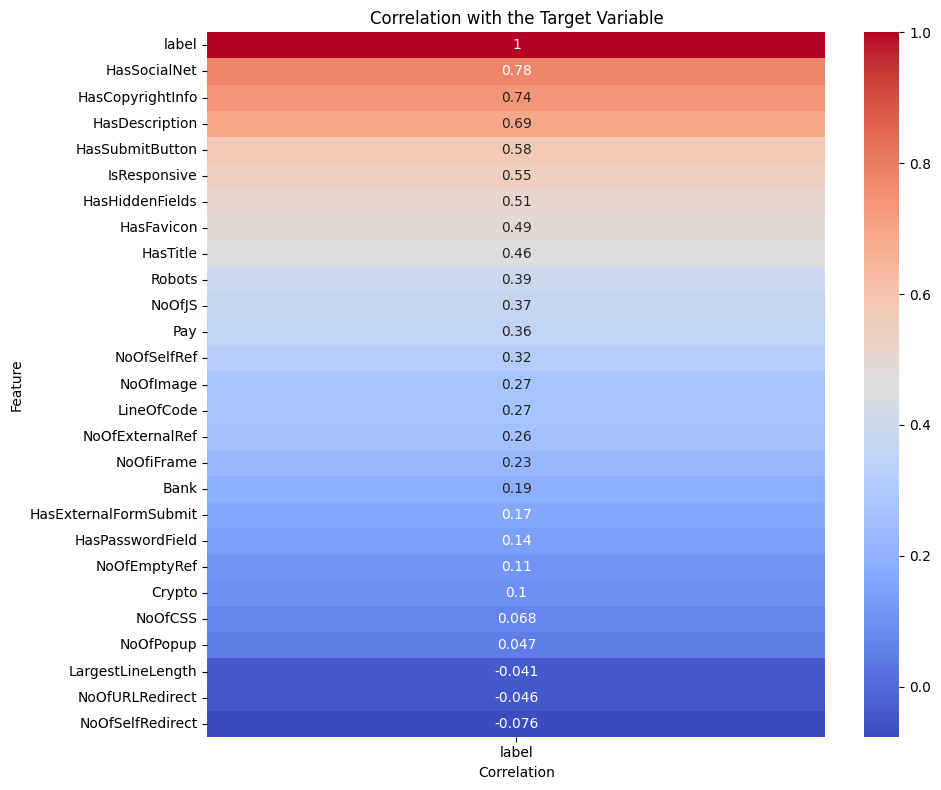

In [42]:
# Correlation Matrix
numerical_features = data.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix
corr = data[numerical_features].corr()['label'].sort_values(ascending=False)

# Plot single feature correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr.to_frame(), cmap='coolwarm', annot=True, cbar=True)
plt.title('Correlation with the Target Variable')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Aquesta informació ens dona una ràpida intuició de la relevancia de cada atribut per predir 'label'.
___

Vist això, veurem primer quins resultats obtenim utilitzant un model qualsevol simple com un random forest classifier.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20167
           1       1.00      1.00      1.00     26993

    accuracy                           1.00     47160
   macro avg       1.00      1.00      1.00     47160
weighted avg       1.00      1.00      1.00     47160



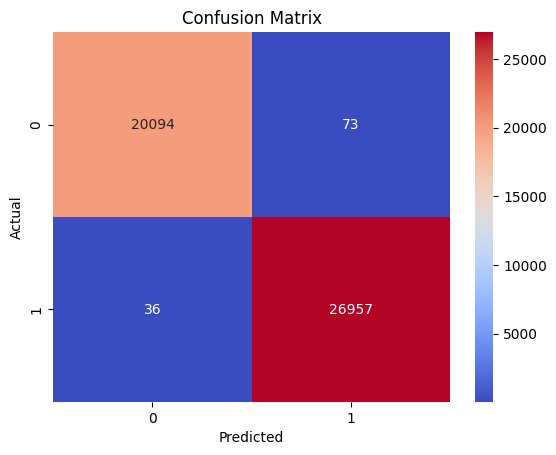

In [43]:
# Perform random forest classifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Step 1: Select only numerical columns of HTML, selecting everything except the target 'label'
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_features = numerical_features[numerical_features != 'label']

# TTS
X_train, X_test, y_train, y_test = train_test_split(data[numerical_features], data['label'], test_size=0.2, random_state=42)

# Step 2: Create the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


A primera vista, les estadistiques del contingut HTML de la pàgina web permeten distingir casi inequivocament si una pàgina és phishing o legítima. Ja que aquest analísi ens mostra la facilitat que els atributs previs tenen per discriminar entre classes, optarem per no utilitzarlos. En cambi, intentarem derivar les nostres propies features a partir del string 'URL'. Aquest enfoc simplifica molt més el problema a la pràctica, pero evidentment dificultarà crear un model amb millor rendiment ja que estem rebutjant informació molt important. A més a més, la creació d'una URL és un procediment amb certa subjectivitat.

Un cop explicat aquest canvi de dinàmica, passarem a l'apartat de Feature engineering:

## Feature Engineering
___


### URL features:

En aquest aparatat desconsiderarem totes les columnes excepte 'URL', 'Domain', 'TLD' i 'label'. Crearem i estudiarem els atributs que extraiem directament de l'URL.

#### URL Length:

(Gupta et al., 2021; Rao et al., 2020; Sahingoz et al., 2019), McGrath i Gupta (2008) van afirmar que els URL de phishing eren més llargues en comparació amb els legítims. Anem a verificar si la distribució de longituds d'URL's per a la classe legitima i phishing és significativament diferent per aquest dataset. (Per temes de visualització, filtrarem només les URL's que tenen fins longitud 300).

In [44]:
# We create a new column called 'URLLength' that contains the length of the URL
data['URLLength'] = data['URL'].apply(len)

Numero de URL's considerades:  232787 de 235796


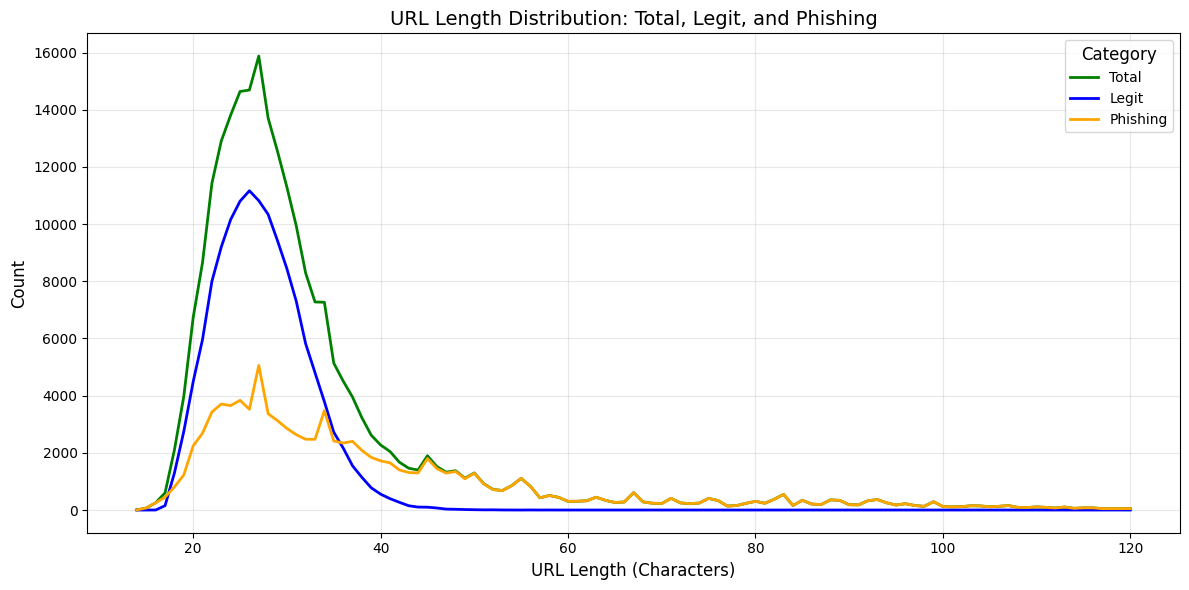

In [45]:
# Filtrar datos por un máximo de longitud para eliminar outliers
max_length = 120  # Ajustar si es necesario
filtered_data = data[data['URLLength'] <= max_length]

print("Numero de URL's considerades: ",len(filtered_data), "de", len(data))

# Crear conteos totales y por clases
total_counts = filtered_data['URLLength'].value_counts().sort_index()
legit_counts = filtered_data[filtered_data['label'] == 1]['URLLength'].value_counts().sort_index()
Phishing_counts = filtered_data[filtered_data['label'] == 0]['URLLength'].value_counts().sort_index()

# Convertir a DataFrame para trazar
line_data = {
    'Length': total_counts.index,
    'Total': total_counts.values,
    'Legit': legit_counts.reindex(total_counts.index, fill_value=0).values,
    'Phishing': Phishing_counts.reindex(total_counts.index, fill_value=0).values
}

# Convertir a DataFrame para usar con Seaborn
line_df = pd.DataFrame(line_data)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Length', y='Total', data=line_df, label='Total', color='green', linewidth=2)
sns.lineplot(x='Length', y='Legit', data=line_df, label='Legit', color='blue', linewidth=2)
sns.lineplot(x='Length', y='Phishing', data=line_df, label='Phishing', color='orange', linewidth=2)

# Configuración del gráfico
plt.xlabel('URL Length (Characters)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('URL Length Distribution: Total, Legit, and Phishing', fontsize=14)
plt.legend(title='Category', fontsize=10, title_fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

A partir del gràfic anterior:
- Les URL legítimes (línia blava) tenen una distribució agrupada en torn als 20-30 caràcters, el que indica que solen ser consistentment estructurades.
- Les URLs de phishing (línia taronja) mostren més variabilitat en les seves longituds, tot i que la majoria es tenen al voltant dels 20-50 caràcters. No obstant això, hi ha una major proporció d'URLs llargues a la classe de phishing.

Analitzem amb un diagrama de caixes la distribució i els cuantils amb més detall:

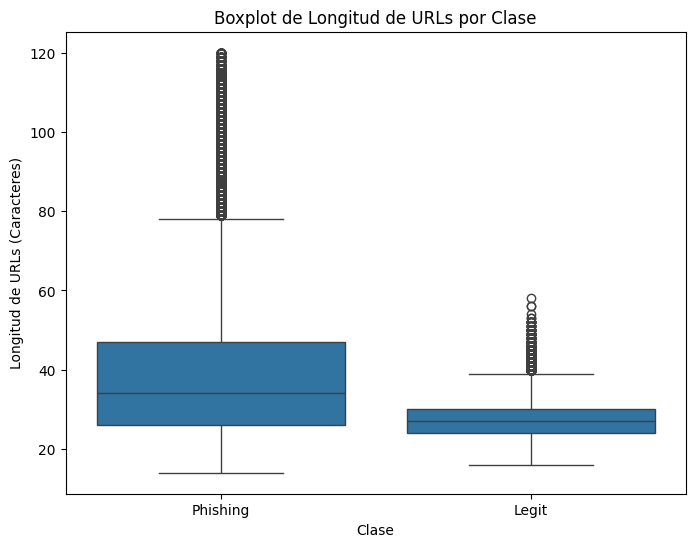

Phishing URLs:
count    100945.000000
mean         46.238774
std          61.074850
min          14.000000
25%          26.000000
50%          34.000000
75%          48.000000
max        6097.000000
Name: URLLength, dtype: float64

Legit URLs:
count    134851.000000
mean         27.228549
std           4.815646
min          16.000000
25%          24.000000
50%          27.000000
75%          30.000000
max          58.000000
Name: URLLength, dtype: float64


In [46]:
# Crear el boxplot para comparar las longitudes de URLs entre clases
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, x='label', y='URLLength')
plt.xticks([0, 1], ['Phishing', 'Legit'])
plt.title("Boxplot de Longitud de URLs por Clase")
plt.ylabel("Longitud de URLs (Caracteres)")
plt.xlabel("Clase")
plt.show()

# Print quantitative statistics
print("Phishing URLs:")
print(data[data['label'] == 0]['URLLength'].describe())
print("\nLegit URLs:")
print(data[data['label'] == 1]['URLLength'].describe())

Destaquem que:
- La mitja de caracters en les URL's phising és: 46.343398 i la desviació estandard és 61.935207.
- La mitja de caracters en les URL's reals és: 27.228610 i la desviació estandard és 4.815612.

Aquests resultants són estadísticament significatius donat el número d'instàncies de cada tipus (més de 100.000). Per aquests motius, podriem considerar que la llongitud de l'URL és un factor discriminant entre classes per aquest dataset particular. 

**Ara be**, una URL pot ser legítima i llarga depenent de la seva finalitat: Això ho dic ja que un dels problemes amb el que ens podriem trobar és que les URL's legitimes **només** es refereixin a la pàgina principal de la web, i no incloeixin altres tipus de 'formes', com per exemple incloent el path o afegint queries. Per exemple; seria dolent que només tinguessim URL's legitimies de la forma: "https://website.com", ja que "https://website.com/?=path1/path2/path3/..." també hauria de ser considerada legitima amb la mateixa probabilitat tot i tenir una longitud molt més llarga. 

Es a dir, volem evitar un overfitting al atribut URL length degut a un biaix cap a URL's legítimes més simples

Si això és el cas, (cosa que sospito degut a una inspecció superficial del dataset), llavors estariem ensenyant al model a correlacionar una URL llarga amb una major probabilitat de ser phishing, cosa que no hauria de tenir sentit aplicant la llògica i observant els casos reals. 

Anem a veure-ho. Per fer això mirarem si hi ha més contingut (path o queries) despres del top-level-domain (.com, .org .net...).



   label  HasPathOrQuery   Count
0      0           False   40511
1      0            True   60434
2      1           False  134851


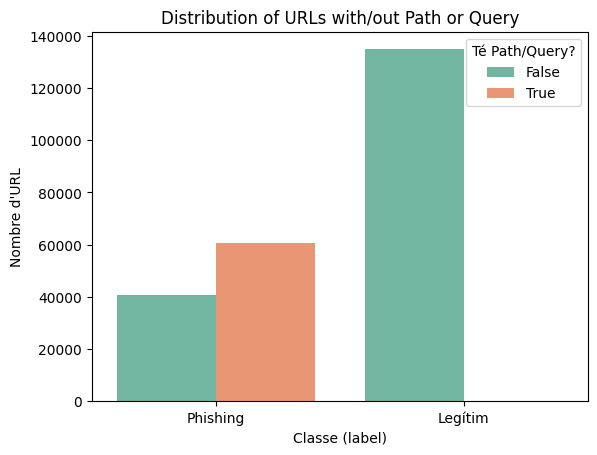

In [47]:
from urllib.parse import urlparse

# Funció per comprovar si una URL té un path o components extra
def has_path_or_query(url):
    try:
        parsed_url = urlparse(url)
        # Comprovar si existeix un path, query, o fragment després del domini
        return bool(parsed_url.path.strip() or parsed_url.query.strip() or parsed_url.fragment.strip())
    except Exception as e:
        print(f"Error parsing URL {url}: {e}")
        return False

# Carregar el dataset
# Suposem que el dataset conté una columna 'URL' i 'label' (0 per phishing, 1 per legítim)
has_info = pd.DataFrame()
has_info['HasPathOrQuery'] = data['URL'].apply(has_path_or_query)
has_info = pd.concat([has_info, data['label']], axis=1)

# Comptar els casos per cada classe
result = has_info.groupby(['label', 'HasPathOrQuery']).size().reset_index(name='Count')

# Resultat per visualitzar
print(result)

# Opcional: Visualitzar els resultats amb un gràfic

sns.barplot(data=result, x='label', y='Count', hue='HasPathOrQuery', palette='Set2')
plt.xticks([0, 1], ['Phishing', 'Legítim'])
plt.xlabel('Classe (label)')
plt.ylabel('Nombre d\'URL')
plt.title('Distribution of URLs with/out Path or Query')
plt.legend(title='Té Path/Query?')
plt.show()


En efecte, observem que **totes** URL's legitimes tenen una forma massa simple. Aquest escenari no representa la realitat i ens generarà overfitting. 
Concloem que aquest atribut no serà molt útil en si mateix. 

No obstant això, l'utilitzarem posteriorment per calcular 'ratios' (com per exemple ratio de digits entre la llongitud de l'URL).

___

#### Host Length:

Una llongitud llarga d'URL no necessariament ha de ser indicadora de phishing, ja que podria ser una url legítima que inclogues algun tipus de query, metadata, redirecció... etc, fent que sigui més llarga. Per abordar aquest tema, podem fixarnos en un altre atribut; el domini. Estudiarem ara la longitud del host, no obstant, probablement estarà altament correlacionada amb la longitud de l'URL.

In [48]:
# Create a new column called 'DomainLength' that contains the length of the domain
data['DomainLength'] = data['Domain'].apply(len)

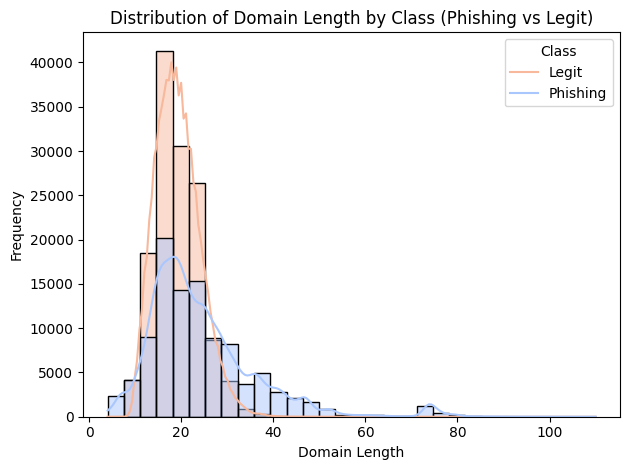

In [49]:
# Histogram for DomainLength
sns.histplot(data=data, x='DomainLength', hue='label', kde=True, palette='coolwarm', bins=30)
plt.title('Distribution of Domain Length by Class (Phishing vs Legit)')
plt.xlabel('Domain Length')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Legit', 'Phishing'])
plt.tight_layout()
plt.show()

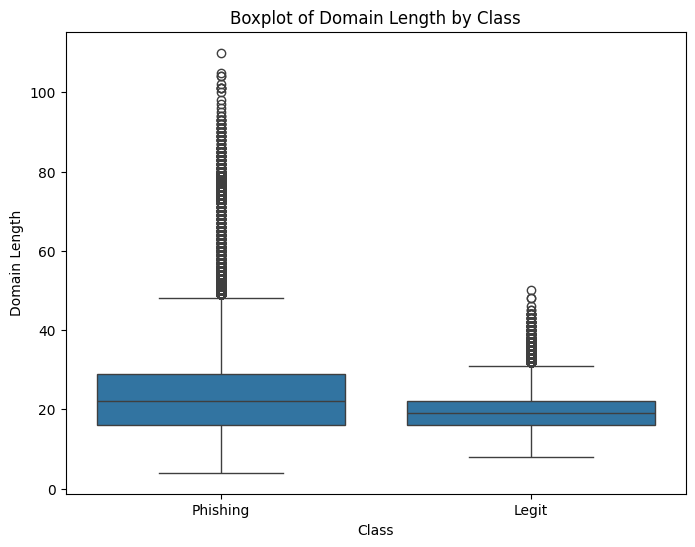

Phishing URLs:
count    100945.000000
mean         24.465144
std          12.204054
min           4.000000
25%          16.000000
50%          22.000000
75%          29.000000
max         110.000000
Name: DomainLength, dtype: float64

Legit URLs:
count    134851.000000
mean         19.228549
std           4.815646
min           8.000000
25%          16.000000
50%          19.000000
75%          22.000000
max          50.000000
Name: DomainLength, dtype: float64

Phishing URL Skewness: 1.8014948428110515


In [50]:
from scipy.stats import skew

# Plot the boxplot, along with the statistics
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='label', y='DomainLength')
plt.xticks([0, 1], ['Phishing', 'Legit'])
plt.title("Boxplot of Domain Length by Class")
plt.ylabel("Domain Length")
plt.xlabel("Class")
plt.show()

# Print quantitative statistics
print("Phishing URLs:")
print(data[data['label'] == 0]['DomainLength'].describe())
print("\nLegit URLs:")
print(data[data['label'] == 1]['DomainLength'].describe())

# Calculate the skewness of the domain length for phishing URLs
domain_length = data[data['label'] == 0]['DomainLength']

# Show the skewness
skewness = skew(domain_length)
print('\nPhishing URL Skewness:', skewness)

In [51]:
from scipy.stats import skew

domain_length = data[data['label'] == 0]['DomainLength']

# Calculate the skewness
skewness = skew(domain_length)
print('Skewness:', skewness)

Skewness: 1.8014948428110515


La distribució d'aquesta nova feature ens aporta més informació:
- En primer lloc, les longitud mitjes segueixen sent diferent per classes. (Phishing: 24.6, Legit: 19.22). Amb les URL's de phishing, es manté un fort biaix cap a les llongituds més llargues.
- No obstant això, s'ha reduit la desviació estandard i la longitud mitja de les URL's phishing, es a dir, estem observant una característica més realística per a aquesta classe ja que no tenim tanta variança i outliers. 


In [52]:
# Check correlationo URLLength and DomainLength
correlation = data['URLLength'].corr(data['DomainLength'])
print('Correlation between URLLength and DomainLength:', correlation)


Correlation between URLLength and DomainLength: 0.2410808961969868


Tot i que existeix certa correlació entre URLLength i DomainLength, no és tan extrem com havia pensat que seria. Per aquests motius, suposarem que pot ser un atribut útil per discriminar entre classes.
___

#### Sub-Domains

Una URL amb un numero elevat de subdominis podria ser un indicador de que s'esta intentant enmascarar el nom d'una altre pàgina. Per exemple: "https:\\\www.amazon.fakesub.hello.com". Anem a analitzar els subdominis pel nostre conjunt de dades.  Voldrem comprobar si existeix una correlació positiva entre el numero de subdominis amb que l'URL sigui de phishing.


In [53]:
# Count the number of subdomains for each URL
data['NoOfSubDomain'] = data['Domain'].apply(lambda x: len(x.split('.')) - 2)

In [54]:
# If instance has more than 1 domain, extract the first one
data['FirstSubDomain'] = data['Domain'].apply(lambda x: x.split('.')[0] if len(x.split('.')) > 2 else "")
data['LengthFirstSubdomain'] = data['FirstSubDomain'].apply(len)
data['DigitsFirstSubdomain'] = data['FirstSubDomain'].apply(lambda x: sum(c.isdigit() for c in x))

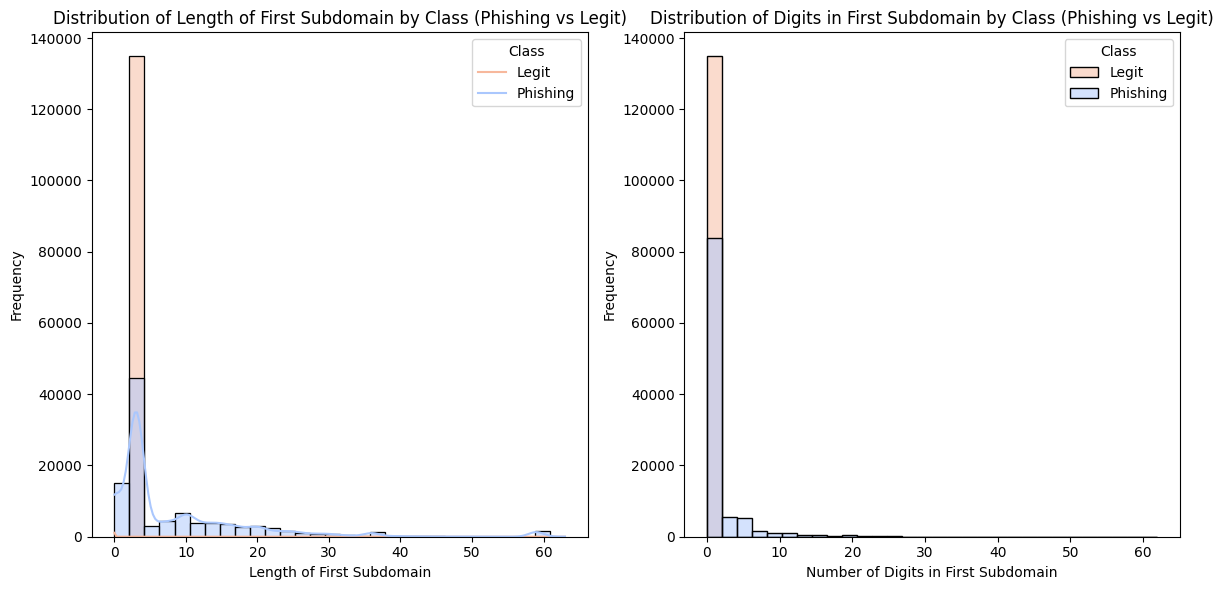

In [55]:
# Plot the distribution of the length of the first subdomain and the number of digits side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='LengthFirstSubdomain', hue='label', kde=True, palette='coolwarm', bins=30)
plt.title('Distribution of Length of First Subdomain by Class (Phishing vs Legit)')
plt.xlabel('Length of First Subdomain')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Legit', 'Phishing'])
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='DigitsFirstSubdomain', hue='label', kde=False, palette='coolwarm', bins=30)
plt.title('Distribution of Digits in First Subdomain by Class (Phishing vs Legit)')
plt.xlabel('Number of Digits in First Subdomain')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Legit', 'Phishing'])
plt.tight_layout()
plt.show()


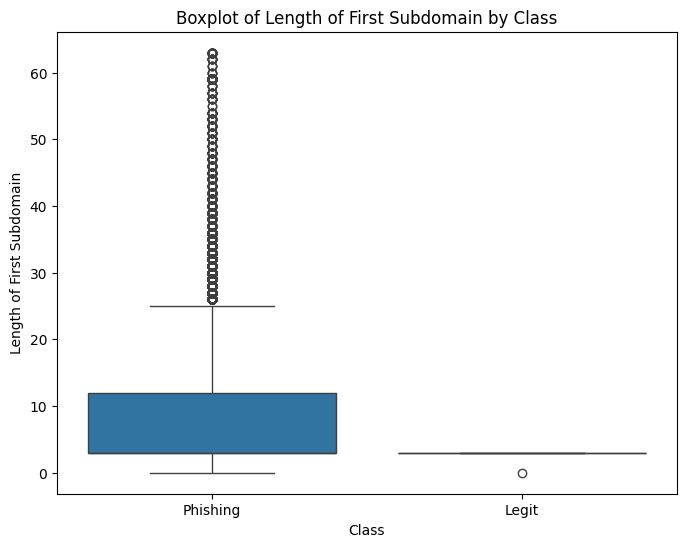

Phishing URLs:
count    100945.000000
mean          8.507564
std          10.719293
min           0.000000
25%           3.000000
50%           3.000000
75%          12.000000
max          63.000000
Name: LengthFirstSubdomain, dtype: float64

Legit URLs:
count    134851.000000
mean          2.999978
std           0.008169
min           0.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: LengthFirstSubdomain, dtype: float64
Phishing URLs:
count    100945.000000
mean          1.358403
std           3.448674
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          62.000000
Name: DigitsFirstSubdomain, dtype: float64

Legit URLs:
count    134851.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: DigitsFirstSubdomain, dtype: float64


In [56]:
# Plot the boxplot, along with the statistics
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='label', y='LengthFirstSubdomain')
plt.xticks([0, 1], ['Phishing', 'Legit'])
plt.title("Boxplot of Length of First Subdomain by Class")
plt.ylabel("Length of First Subdomain")
plt.xlabel("Class")
plt.show()

# Print quantitative statistics
print("Phishing URLs:")
print(data[data['label'] == 0]['LengthFirstSubdomain'].describe())
print("\nLegit URLs:")
print(data[data['label'] == 1]['LengthFirstSubdomain'].describe())

# Print the statistics of the number of digits in the first subdomain
print("Phishing URLs:")
print(data[data['label'] == 0]['DigitsFirstSubdomain'].describe())
print("\nLegit URLs:")
print(data[data['label'] == 1]['DigitsFirstSubdomain'].describe())



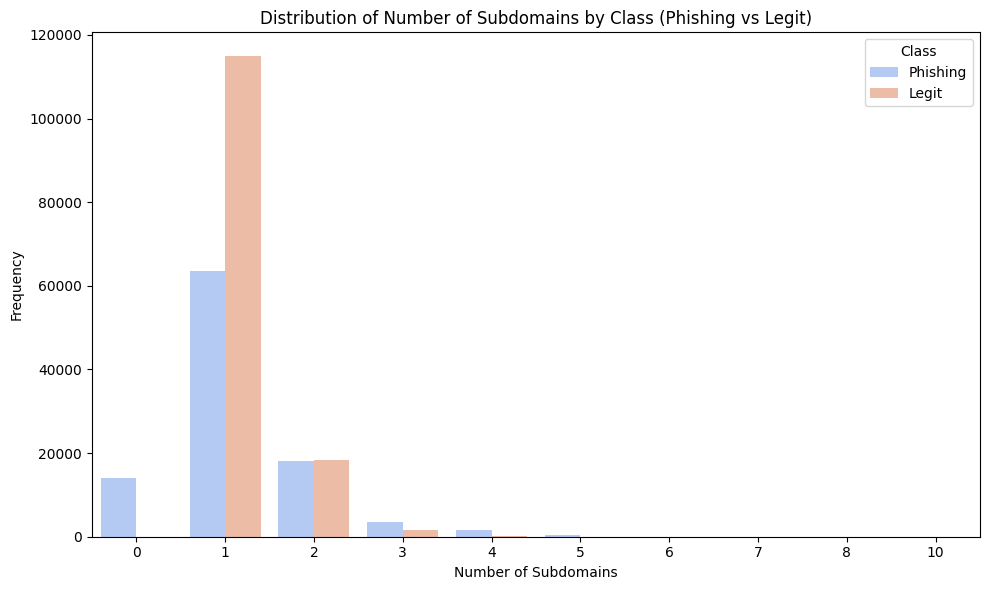

Fake URLs:
NoOfSubDomain
1     62.950121
2     17.945416
0     13.852098
3      3.395909
4      1.488930
5      0.332855
6      0.020803
10     0.004953
7      0.004953
8      0.003963
Name: proportion, dtype: float64

Legit URLs:
NoOfSubDomain
1    85.176232
2    13.524557
3     1.253977
4     0.044494
0     0.000742
Name: proportion, dtype: float64


In [57]:
# Plot the distribution of the number of subdomains
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='NoOfSubDomain', hue='label', palette='coolwarm')
plt.title('Distribution of Number of Subdomains by Class (Phishing vs Legit)')
plt.xlabel('Number of Subdomains')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Phishing', 'Legit'])
plt.tight_layout()
plt.show()

# Print quantitative percentage statistics
print("Fake URLs:")
print(data[data['label'] == 0]['NoOfSubDomain'].value_counts(normalize=True) * 100)
print("\nLegit URLs:")
print(data[data['label'] == 1]['NoOfSubDomain'].value_counts(normalize=True) * 100)

Observem que aqui pot haver un problema ja que: 
- No hi ha cap URL legítima sense el subdomini 'www'. De fet, cap URL legítima al dataset te menys d'un subdomini, cosa que sí passa amb la classe 'phishing'.  Aixó ens pot exposar a fer overfitting ja que una pagina no ha de necessariament tenir 'www.' per ser legitima (Per exemple: https://caronte.cat/).
- La majoria d'URLs (el 85% de les legitimes i 62% de les phishing) utilitzen **un sol** subdomini: (www). Per tant, hi ha un 15% d'URL's legítimes amb mes d'un subdomini, comparat amb un 38% d'URL's falses amb numero de subdominis diferent de 1. 

Degut a aquests problemes, i a la lleugera correlació, probablement no serà un atribut tan important exceptuant en les situacións on el nombré de subdominis sigui bastant elevat. Mantindrem aquest atribut pero sense oblidarnos dels problemes que ens pot causar.

#### Top-Level-Domain (TLD)

Un altre atribut a analitzar és el TLD ('com', 'org', 'es'...). Voldrem veure si hi ha certs TLD més comuns per una classe que l'altre. Graficarem els més freqüents per cada classe. Això té sentit ja que els TLD disponibles gratuits solen ser menys utilitzats.

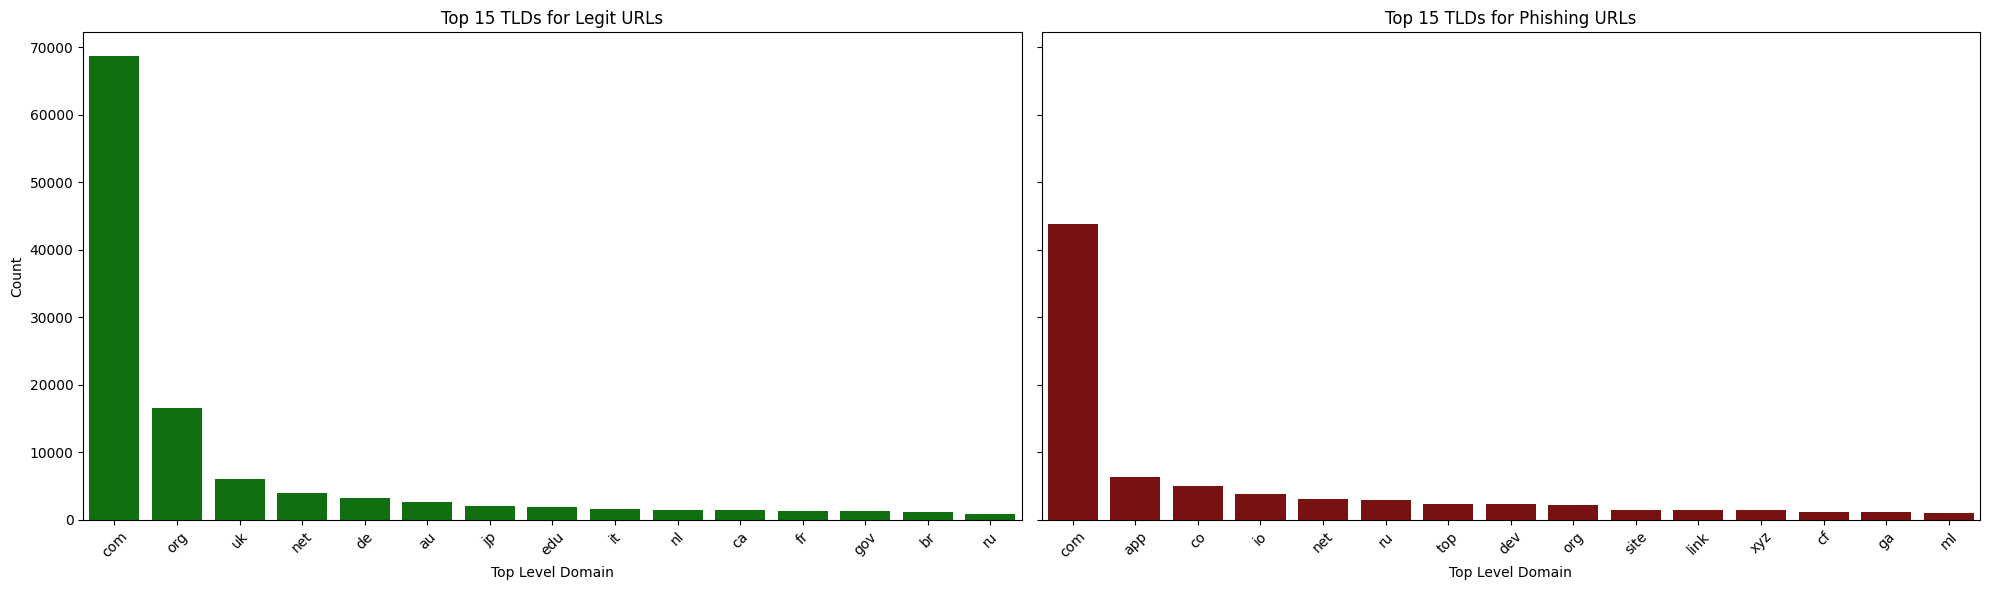

In [58]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Create a count plot of the top 15 TLDs of the class 'legit' '1'
sns.countplot(ax=axes[0], data=data[data['label'] == 1], x='TLD', order=data[data['label'] == 1]['TLD'].value_counts().index[:15], color='green')
axes[0].set_title('Top 15 TLDs for Legit URLs')
axes[0].set_xlabel('Top Level Domain')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Create a count plot of the top 15 TLDs of the class 'Phishing' '0'
sns.countplot(ax=axes[1], data=data[data['label'] == 0], x='TLD', order=data[data['label'] == 0]['TLD'].value_counts().index[:15], color='darkred')
axes[1].set_title('Top 15 TLDs for Phishing URLs')
axes[1].set_xlabel('Top Level Domain')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [59]:
# Print percentage of each TLD in the dataset for each class
tld_counts = data['TLD'].value_counts()
tld_legit_counts = data[data['label'] == 1]['TLD'].value_counts()
tld_fake_counts = data[data['label'] == 0]['TLD'].value_counts()

print("Total count of different TLDs:", len(tld_counts))

# Calculate the percentage of each TLD in the dataset
tld_percentages = tld_counts / len(data) * 100
tld_legit_percentages = tld_legit_counts / len(data[data['label'] == 1]) * 100
tld_fake_percentages = tld_fake_counts / len(data[data['label'] == 0]) * 100

print("\nTop 10 TLDs by Percentage in Legit URLs:")
print(tld_legit_percentages.head(10))
print("\nTop 10 TLDs by Percentage in Fake URLs:")
print(tld_fake_percentages.head(10))

Total count of different TLDs: 695

Top 10 TLDs by Percentage in Legit URLs:
TLD
com    51.008891
org    12.253524
uk      4.503489
net     2.964754
de      2.454561
au      1.932503
jp      1.543926
edu     1.376334
it      1.237662
nl      1.139035
Name: count, dtype: float64

Top 10 TLDs by Percentage in Fake URLs:
TLD
com     43.359255
app      6.308386
co       4.917529
io       3.733716
net      3.069989
ru       2.955075
top      2.305216
dev      2.290356
org      2.247759
site     1.463173
Name: count, dtype: float64


Tenim 695 TLD diferents. Observem que:
- La majoria d'URL's phishing i legítimes acaben en '.com'. ()
- Molts TLD majoritariament ocurrents en les pagines phising com '.app, .cloud, .io, .link, .xyz', no apareixen o són molt pocs en la classe legítima.
- Hi ha un desbalanç en el nombre de TLD.

Per aquests motius, no el considerarem rellevant.

#### Digits In URL

Analitzem la presencia de digits en les URL. (Gupta et al., 2021; Rao et al., 2020; Sahingoz et al., 2019), van afirmar que els dominis de phishing inclouen més numeros que en els legitims, com per exemple les URL's que contenen direccions IP's. Anem a comprovar-ho en el nostre cas:
Crearem una feature binaria que diu si l'URL conté una direcció IP o no, i dues features que compten la quantitat de digits en l'URL i en el domini web. 

In [60]:
import re

# Function to check if a domain is an IP address
def is_ip_address(domain):
    # Regular expression to match IPv4 addresses
    ip_pattern = re.compile(r'(^|\.)\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}($|\.)')
    return 0 if ip_pattern.search(domain) is None else 1

# Apply the function to create the new feature
data['IsDomainIP'] = data['Domain'].apply(is_ip_address)

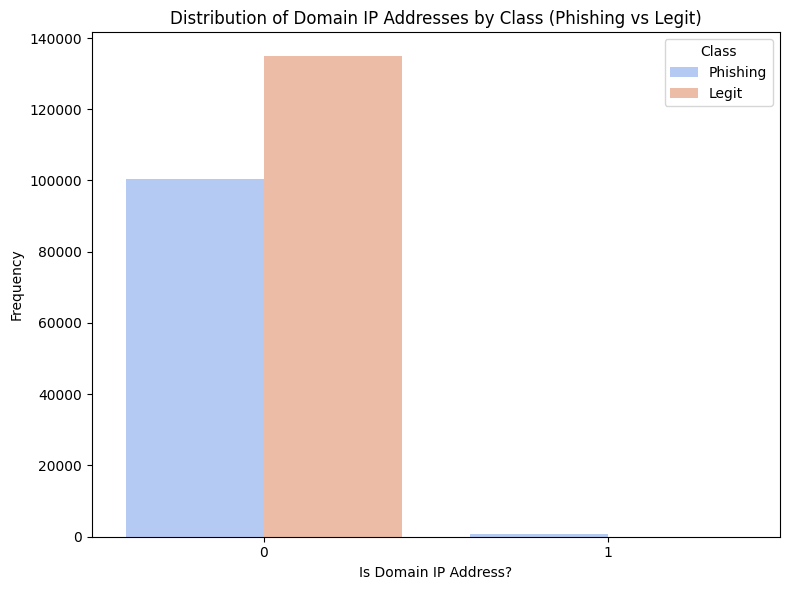

Fake URLs:
IsDomainIP
0    100315
1       630
Name: count, dtype: int64

Legit URLs:
IsDomainIP
0    134851
Name: count, dtype: int64


In [61]:
# Plot the distribution of the new feature 'IsDomainIP'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='IsDomainIP', hue='label', palette='coolwarm')
plt.title('Distribution of Domain IP Addresses by Class (Phishing vs Legit)')
plt.xlabel('Is Domain IP Address?')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Phishing', 'Legit'])
plt.tight_layout()
plt.show()

# Print count of IP addresses for each class
print("Fake URLs:")
print(data[data['label'] == 0]['IsDomainIP'].value_counts())
print("\nLegit URLs:")
print(data[data['label'] == 1]['IsDomainIP'].value_counts())



In [62]:
# Create features NoOfDigitsInURL, NoOfDigitsInDomain, IsIP
data['NoOfDegitsInURL'] = data['URL'].apply(lambda x: sum(c.isdigit() for c in x))
data['NoOfDigitsInDomain'] = data['Domain'].apply(lambda x: sum(c.isdigit() for c in x))

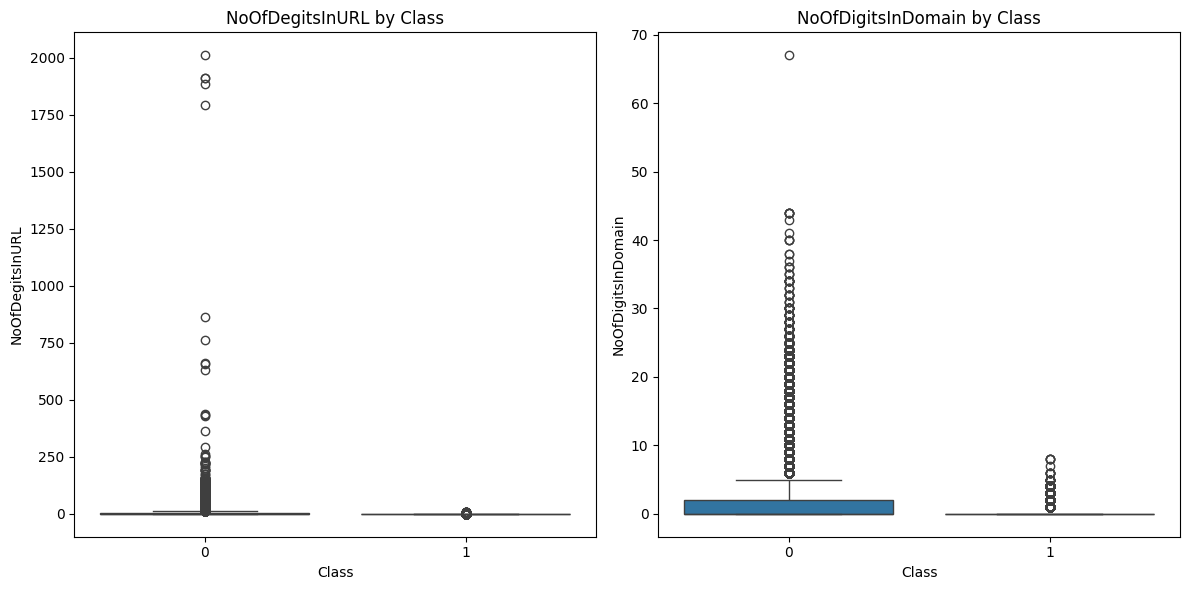

NoOfDigitsInURL:
          count      mean        std  min  25%  50%  75%     max
label                                                           
0      100945.0  4.338273  17.880828  0.0  0.0  0.0  5.0  2011.0
1      134851.0  0.050597   0.350325  0.0  0.0  0.0  0.0     8.0

NoOfDigitsInDomain:
          count      mean       std  min  25%  50%  75%   max
label                                                        
0      100945.0  1.993729  3.984746  0.0  0.0  0.0  2.0  67.0
1      134851.0  0.050597  0.350325  0.0  0.0  0.0  0.0   8.0


In [63]:
# Boxplot for NoOfDigitsInURL and NoOfDigitsInDomain one side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='label', y='NoOfDegitsInURL')
plt.title('NoOfDegitsInURL by Class')
plt.xlabel('Class')
plt.ylabel('NoOfDegitsInURL')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='label', y='NoOfDigitsInDomain')
plt.title('NoOfDigitsInDomain by Class')
plt.xlabel('Class')
plt.ylabel('NoOfDigitsInDomain')

plt.tight_layout()
plt.show()


# Show statistics for the new features for each class
print("NoOfDigitsInURL:")
print(data.groupby('label')['NoOfDegitsInURL'].describe())

print("\nNoOfDigitsInDomain:")
print(data.groupby('label')['NoOfDigitsInDomain'].describe())

Observem que:
- Les URL i els dominis phishing contenen molt més dígits en comparació amb els URL legítims. La variabilitat i els outliers (p. ex., 2011 digits) en els URL de phishing podrien ser un indicador fort, però problement haguem de normalitzar les dades per grantir un anàlisi significatiu.


Cal considerar pero, que en una URL més llarga, és possible que hi hagi més numeros, per tant, considerarem el ratio de digits entre la llargada de l'URL i el ratio en el Domini com possibles atributs discriminadors.

In [64]:
# Consider the ratio of digits in the URL
data['DegitRatioInURL'] = data['NoOfDegitsInURL'] / data['URLLength']
data['DigitRatioInDomain'] = data['NoOfDigitsInDomain'] / data['DomainLength']

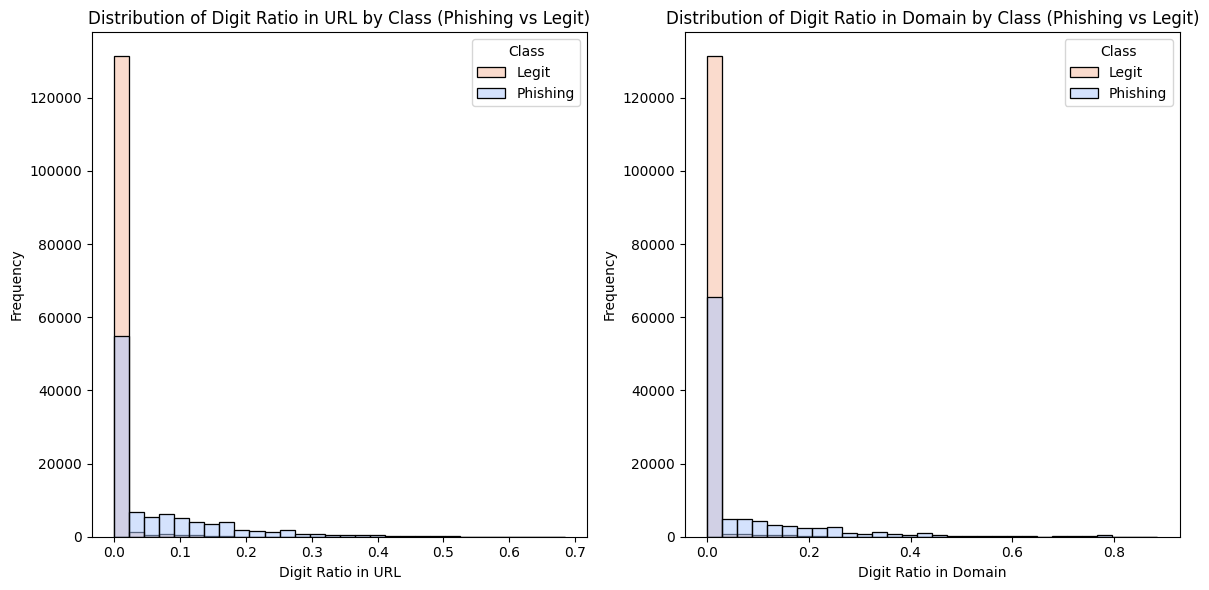

T-Statistic: 233.54713540785283
P-Value: 0.0


In [65]:
# Plot the distribution of the digit ratio in the URL

# Create subplots one for Ratio in Url and one for the ratio in Domain
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='DegitRatioInURL', hue='label', kde=False, palette='coolwarm', bins=30)
plt.title('Distribution of Digit Ratio in URL by Class (Phishing vs Legit)')
plt.xlabel('Digit Ratio in URL')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Legit', 'Phishing'])

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='DigitRatioInDomain', hue='label', kde=False, palette='coolwarm', bins=30)
plt.title('Distribution of Digit Ratio in Domain by Class (Phishing vs Legit)')
plt.xlabel('Digit Ratio in Domain')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Legit', 'Phishing'])
plt.tight_layout()
plt.show()

# Print quantitative statistics with p-values
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(data[data['label'] == 0]['DegitRatioInURL'], data[data['label'] == 1]['DegitRatioInURL'])

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)



Observem que:
- En ambdós casos, la majoria de les dades tenen un ratio de dígits proper a 0, amb una concentració més alta en les URL legítimes. Les pàgines de phishing mostren una lleugera dispersió cap a ratios de dígits més elevats. Això podria indicar que els URLs o dominis amb més dígits són més comuns en els intents de phishing

#### Caracters especials


Analitzarem la presencia de URLs amb caracters especials tant en el la URL, com en el host. No obsant, els resultats obtinguts per la URL probablement no siguin molt útils pels motius previament mencionats en URL Length. (La forma depen del contexte i l'ús de l'URL).

In [66]:
# We will create 'NoOfEqualsInURL', 'NoOfQMarkInURL','NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpecialCharRatioInURL', 'NoOfSpecialInDomian', 'SpecialCharRatioInDomain' features

# Count the number of special characters in the URL
data['NoOfEqualsInURL'] = data['URL'].apply(lambda x: x.count('='))
data['NoOfQMarkInURL'] = data['URL'].apply(lambda x: x.count('?'))
data['NoOfAmpersandInURL'] = data['URL'].apply(lambda x: x.count('&'))
data['NoOfHyphenInURL'] = data['URL'].apply(lambda x: x.count('-'))
data['NoOfHyphenInDomain'] = data['Domain'].apply(lambda x: x.count('-'))

In [67]:
def count_other_special_chars_url(url):
    # Count for a caracter if its not alphanumeric
    return  sum(1 for c in url if not c.isalnum()) - 3

def count_other_special_chars_domain(domain):
    return  sum(1 for c in domain if not c.isalnum())


# Apply the function to create the new feature
data['NoOfOtherSpecialCharsInURL'] = data['URL'].apply(count_other_special_chars_url)
data['SpacialCharRatioInURL'] = data['NoOfOtherSpecialCharsInURL'] / data['URLLength']
data['NoOfOtherSpecialInDomain'] = data['Domain'].apply(count_other_special_chars_domain)
data['SpecialCharRatioInDomain'] = data['NoOfOtherSpecialInDomain'] / data['DomainLength']

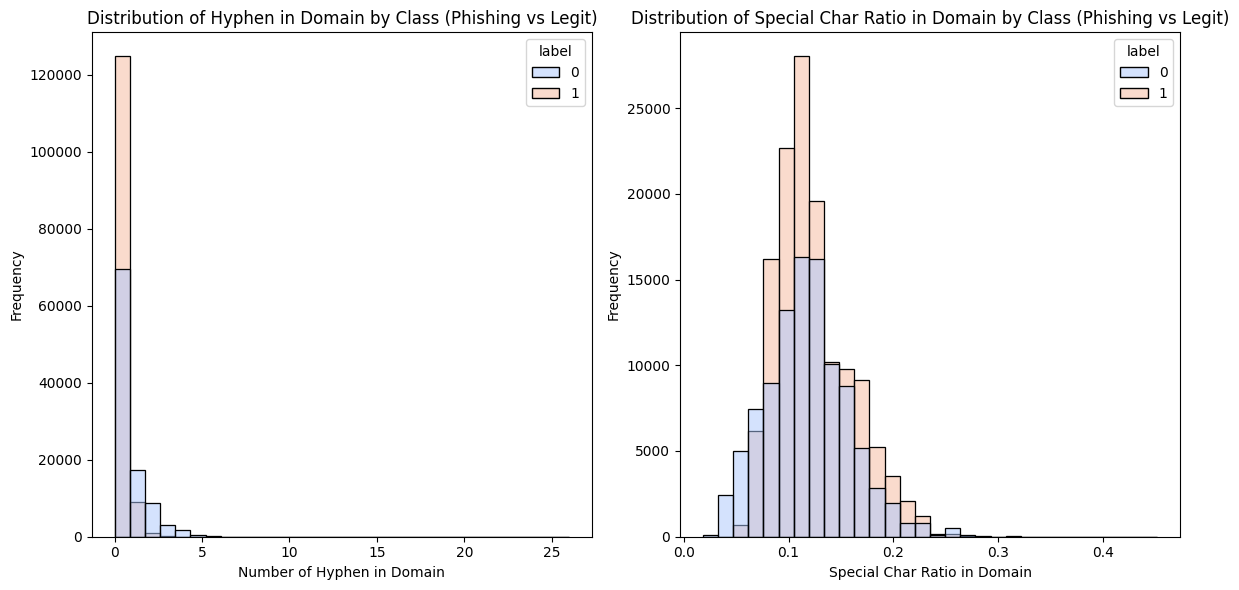

In [68]:
# Plot the distribution of the new features in the domain
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='NoOfHyphenInDomain', hue='label', kde=False, palette='coolwarm', bins=30)
plt.title('Distribution of Hyphen in Domain by Class (Phishing vs Legit)')
plt.xlabel('Number of Hyphen in Domain')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='SpecialCharRatioInDomain', hue='label', kde=False, palette='coolwarm', bins=30)
plt.title('Distribution of Special Char Ratio in Domain by Class (Phishing vs Legit)')
plt.xlabel('Special Char Ratio in Domain')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Continuation Rate

Ens agradaria capturar la següent idea: 
Volem crear un atribut que tingui en compte quan hi ha una combinació molt "entremaliada" de lletres i simbols, (com per exemple: "l1nk-f4ls-o", "ab3d-d2a2-1sa1"...), ja que penso que les combinacions extranyes solen intentar confondre al usuari. Per fer aixo crearem una feature anomenada 'CharContinuationRate', que compta el ratio de numero de canvis de tipus de simbols entre la llongitud del CoreDomain que es produeixen. Ho farem tant en la URL com en el domini pels mateixos motius mencionats.

In [69]:
import re

def calculate_char_continuation_rate(domain):
 
    if domain.startswith("www."):
        domain = domain[4:]

    groups = re.findall(r'[a-zA-Z]+|\d+|[^a-zA-Z\d]', domain)
    groups = groups[:-2]

    # Groups is groups except the last two elements
    num_switches = len(groups)
    
    # Lenght of concatenated groups
    total_length = len("".join(groups))
    
    if len(groups) <= 2:
        return 1.0
    
    if groups[-2] == ".":
        num_switches += 1 

    char_continuation_rate = (total_length - (num_switches - 2) ) / total_length

    return char_continuation_rate

# Apply the function to create the new feature
data['CharContinuationRate'] = data['Domain'].apply(calculate_char_continuation_rate)

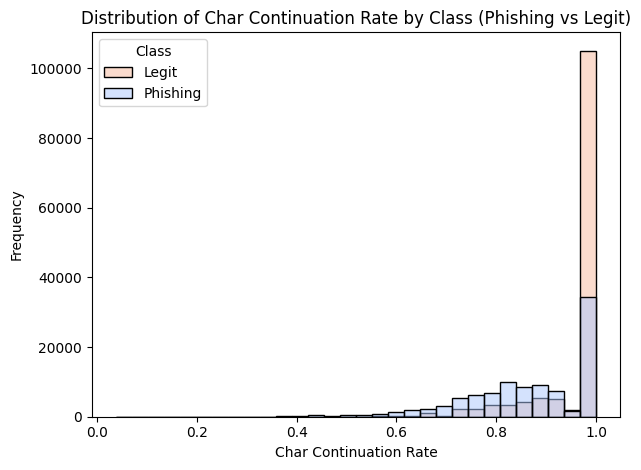

In [70]:
# Plot the distribution of the char continuation rate
sns.histplot(data=data, x='CharContinuationRate', hue='label', kde=False, palette='coolwarm', bins=30)
plt.title('Distribution of Char Continuation Rate by Class (Phishing vs Legit)')
plt.xlabel('Char Continuation Rate')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Legit', 'Phishing'])
plt.tight_layout()
plt.show()


#### IsHTTPS


Una hipótesis que voldrem comprovar és si una pàgina protegida per certificat SSL (com HTTPS) permet distinguir la classe real i falsa de forma decent.

In [71]:
data['IsHTTPS'] = data['URL'].apply(lambda x: 1 if x.startswith('https') else 0)

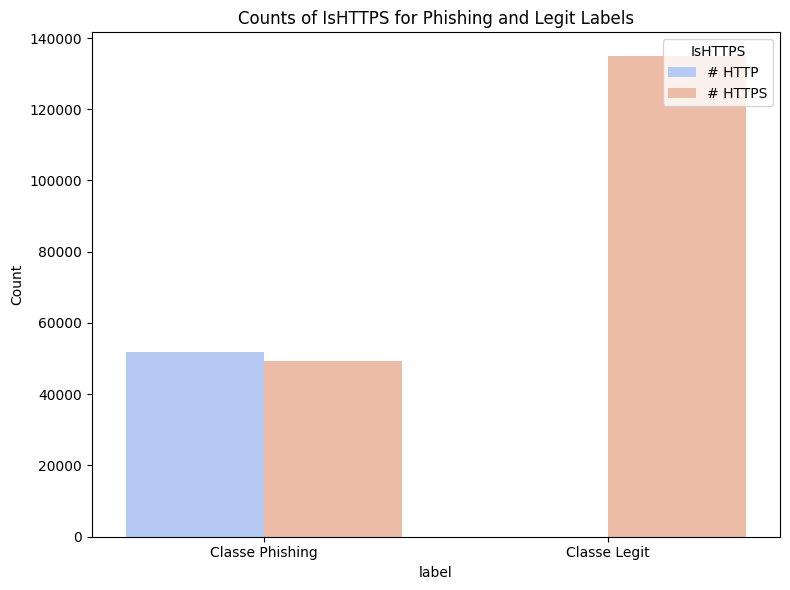

Phishing HTTP: 51749
Phishing HTTPS: 49196
-----------------
Legit HTTP: 0
Legit HTTPS: 134851


In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', hue='IsHTTPS', data=data, palette='coolwarm')

# Add custom labels, title, and legend
plt.xticks([0, 1], ['Classe Phishing', 'Classe Legit'])
plt.ylabel('Count')
plt.title('Counts of IsHTTPS for Phishing and Legit Labels')
plt.legend(title='IsHTTPS', labels=['# HTTP', '# HTTPS'], loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()

class_counts = data.groupby(['label', 'IsHTTPS']).size().unstack(fill_value=0)

Phishing_http = class_counts.loc[0, 0]  # Classe Phishing, HTTP
Phishing_https = class_counts.loc[0, 1]  # Classe Phishing, HTTPS
legit_http = class_counts.loc[1, 0]  # Classe Legit, HTTP
legit_https = class_counts.loc[1, 1]  # Classe Legit, HTTPS

# Print in the desired format
print('Phishing HTTP:', Phishing_http)
print('Phishing HTTPS:', Phishing_https)
print("-----------------")
print('Legit HTTP:', legit_http)
print('Legit HTTPS:', legit_https)


Observem que:
- **Totes** les URL's legitimes, inclouen HTTPS.
- **La meitat** d'URL's phising són HTTPS.

Això ens dona informació important a l'hora de crear el nostre model, ja que **el conjunt de dades té un biaix** que pot no ser representatiu d'un escenari real. Per exemple, una URL legítima podria tenir HTTP (sobretot en sistemes antics o configuracions especials). Haurem de considerar aquesta possibilitat d'overfitting a l'attribut isHTTPS. 

Tot i així, a diferencia del cas de 'URLLength', té sentit mantenir aquest atribut ja que volem desconfiar en les pàgines web sense certificat SSL. 
___


### Common Words

Carguem el dataset de paraules comunes angleses:

In [73]:
common_words_df = pd.read_csv("data/unigram_freq.csv")  # Ensure the dataset has a single column of words
common_words_df.head()

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698


In [74]:
common_words_df = pd.read_csv("data/unigram_freq.csv")  # Ensure the dataset has a single column of words

common_words = common_words_df.drop(columns='count')

# Ensure that all values in the 'word' column are strings
common_words['word'] = common_words['word'].astype(str)

# Delete common words with less than 4 characters
common_words = common_words[common_words['word'].apply(len) >= 4]

common_words_set = set(common_words['word'])

print("Dimensions of common_words_df:", common_words.shape)


Dimensions of common_words_df: (319652, 1)


In [75]:
import tldextract

def extract_core_domain(domain):
    # Parse the domain using tldextract
    extracted = tldextract.extract(domain)
    
    # Construct the core domain without suffix
    core_domain = '.'.join(part for part in [extracted.subdomain, extracted.domain] if part)
    
    # Remove the "www." prefix from the core domain
    if core_domain.startswith("www."):
        core_domain = core_domain[4:]
    
    return core_domain

#apply the function to the data and create a new column 'CoreDomain'
data['CoreDomain'] = data['Domain'].apply(extract_core_domain)

### Natural Language Processing

In [76]:
import wordninja

def compute_ratio(CoreDomain):
    # Split domain into potential words
    split_words = wordninja.split(CoreDomain)
    
    # Filter for words > 3 characters and without digits
    actual_words = [word for word in split_words if len(word) > 3 and word.isalpha()]
    
    # Count common words
    num_common_words = sum(1 for word in actual_words if word in common_words_set)
    
    # Calculate ratio
    if len(split_words) == 0:  # Avoid division by zero
        ratio = 0
    else:
        ratio = sum(len(word) ** 2 for word in actual_words) / (len(CoreDomain) * len(split_words))
    
    return ratio, num_common_words

# Apply the function to the dataset in a single pass
data[['RatioNLP', 'CommonWords']] = data['CoreDomain'].apply(
    lambda x: pd.Series(compute_ratio(x))
)

In [77]:
'''
# Example of how to wordninja works
url = 'tatteredraggedtoolbox.atentos2230.repl' 

url.split:

['tattered', 'ragged', 'toolbox', 'aten', 'to', 's', '2230', 're', 'pl']
['tattered', 'ragged', 'toolbox', 'aten']
4
(0.4824561403508772, 4)
'''


"\n# Example of how to wordninja works\nurl = 'tatteredraggedtoolbox.atentos2230.repl' \n\nurl.split:\n\n['tattered', 'ragged', 'toolbox', 'aten', 'to', 's', '2230', 're', 'pl']\n['tattered', 'ragged', 'toolbox', 'aten']\n4\n(0.4824561403508772, 4)\n"

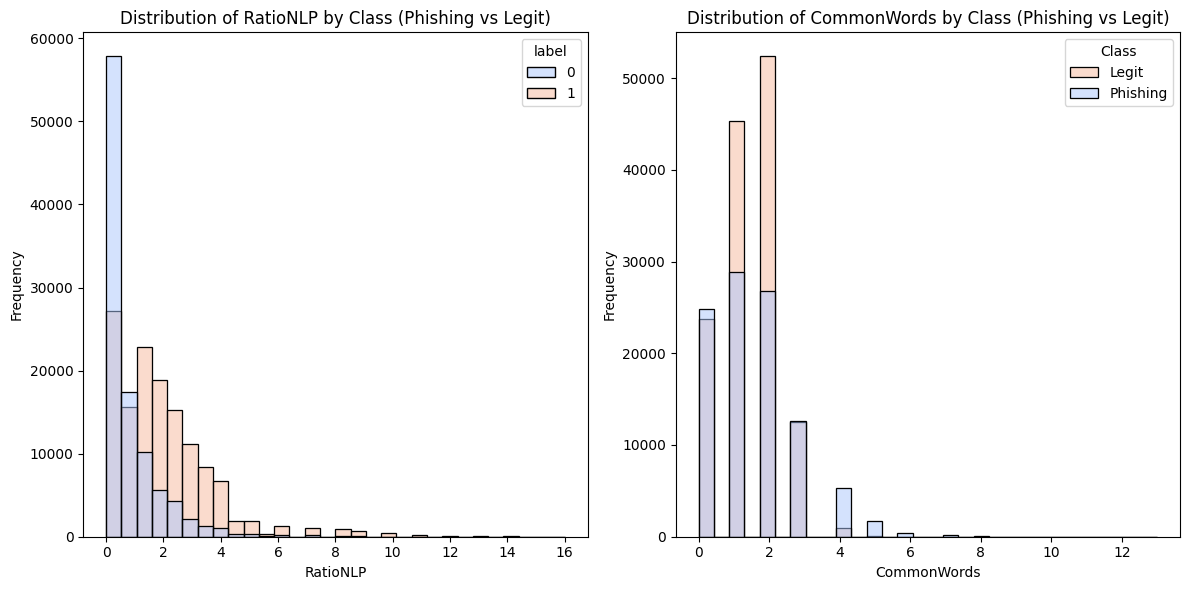

             RatioNLP  CommonWords     label
RatioNLP     1.000000     0.219152  0.365053
CommonWords  0.219152     1.000000 -0.050999
label        0.365053    -0.050999  1.000000


In [78]:
# Study the RatioNLP and CommonWords features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='RatioNLP', hue='label', kde=False, palette='coolwarm', bins=30)
plt.title('Distribution of RatioNLP by Class (Phishing vs Legit)')
plt.xlabel('RatioNLP')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='CommonWords', hue='label', kde=False, palette='coolwarm', bins=30)
plt.title('Distribution of CommonWords by Class (Phishing vs Legit)')
plt.xlabel('CommonWords')
plt.legend(title='Class', labels=['Legit', 'Phishing'])
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print the correlation of the new features with the label
print(data[['RatioNLP', 'CommonWords', 'label']].corr())

## Dataset Preprocessing
___

En aquest apartat prepararem el dataset de tal manera que pugi ser utilitzat per els diferents models.

Primer eliminarem totes les columnes que no utilitzarem (HTML)

In [79]:
data.columns

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label', 'URLLength',
       'DomainLength', 'NoOfSubDomain', 'FirstSubDomain',
       'LengthFirstSubdomain', 'DigitsFirstSubdomain', 'IsDomainIP',
       'NoOfDegitsInURL', 'NoOfDigitsInDomain', 'DegitRatioInURL',
       'DigitRatioInDomain', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfHyphenInURL', 'NoOfHyphenInDomain',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL',
       'NoOfOtherSpecialInDomain', 'SpecialCharRatioInDomain',
       'CharContinuationRate',

Les columnes: 'FILENAME', 'URL', 'Domain', 'TLD' i totes les HTML seran eliminades:


In [80]:
delete_columns = ['FILENAME', 'URL', 'Domain', 'TLD', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'CoreDomain', 'FirstSubDomain']

clean_data = data.drop(delete_columns, axis=1)

In [81]:
# print attributes of use 
print(clean_data.columns)
print(clean_data.shape)

Index(['label', 'URLLength', 'DomainLength', 'NoOfSubDomain',
       'LengthFirstSubdomain', 'DigitsFirstSubdomain', 'IsDomainIP',
       'NoOfDegitsInURL', 'NoOfDigitsInDomain', 'DegitRatioInURL',
       'DigitRatioInDomain', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfHyphenInURL', 'NoOfHyphenInDomain',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL',
       'NoOfOtherSpecialInDomain', 'SpecialCharRatioInDomain',
       'CharContinuationRate', 'IsHTTPS', 'RatioNLP', 'CommonWords'],
      dtype='object')
(235796, 24)


### Feature selection

L'objectiu es assolir un bon rendiment mantenint la simplicitat. Volem seleccionar els atributs mes significatius i per fer això hem observat anteriorment la matriu de correlació, juntament amb les multiples reflexions que hem fet observant les distribucions dels atributs creats. 

Atès que estem treballant en un problema de classificació, els mètodes basats en arbres, com ara Random Forest o XGBoost, són molt adequats per determinar la importància de les característiques, ja que gestionen les no linealitats i les interaccions d'una forma natural. Usarem un random forest classifier per classificar les característiques i seleccionar les més importants.

C:\Users\aiman\AppData\Local\Temp\ipykernel_28228\37473752.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(18), palette='coolwarm')


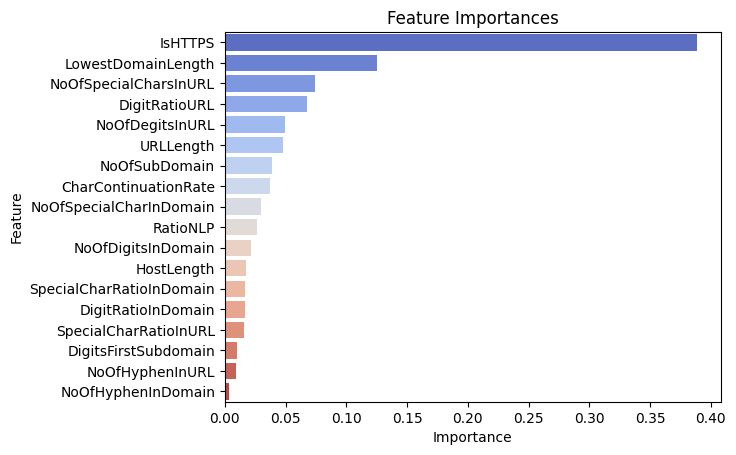

In [82]:
from sklearn.ensemble import RandomForestClassifier

X = clean_data.drop(columns=['label'])  # Drop target column
y = clean_data['label']

# Fit Random Forest to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Change feature_importance_df column names to: "NoOfOtherSpecialCharsInURL to NoOfSepcialCharsInURL", "SpacialCharRatioInURL to SpecialCharRatioInURL", "NoOfOtherSpecialInDomain to NoOfSpecialCharInDomain"

feature_importance_df['Feature'] = feature_importance_df['Feature'].replace({
    'NoOfOtherSpecialCharsInURL': 'NoOfSpecialCharsInURL',
    'SpacialCharRatioInURL': 'SpecialCharRatioInURL',
    'NoOfOtherSpecialInDomain': 'NoOfSpecialCharInDomain',
    'DomainLength': 'HostLength',
    'LengthFirstSubdomain': 'LowestDomainLength',
    'NoOfDigitsInURL': 'LowestDomainDigits',
    'DigitRatioDomain': 'DigitsRatioHost',
    'DegitRatioInURL':'DigitRatioURL'
})

# Plot feature importance of 20 most important features
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(18), palette='coolwarm')
plt.title("Feature Importances")
plt.show()


Observem que:
- S'està donant molta prioritat al atribut IsHTTPS i als que estan altament correlacionats amb l'URL length. 
- Els atributs relacionats amb el domini pasen molt més desapercebuts. 

Aquests resultats, juntament amb el que hem vist anteriorment em fan sospitar que s'està produint un overfitting, que causarà un aparent bon rendiment en la part de l'entrenament i la validació **d'aquest conjunt de dades**, pero a l'hora d'implementar el model en un cas real, serà molt més deficient. Detallarem això més endavant.

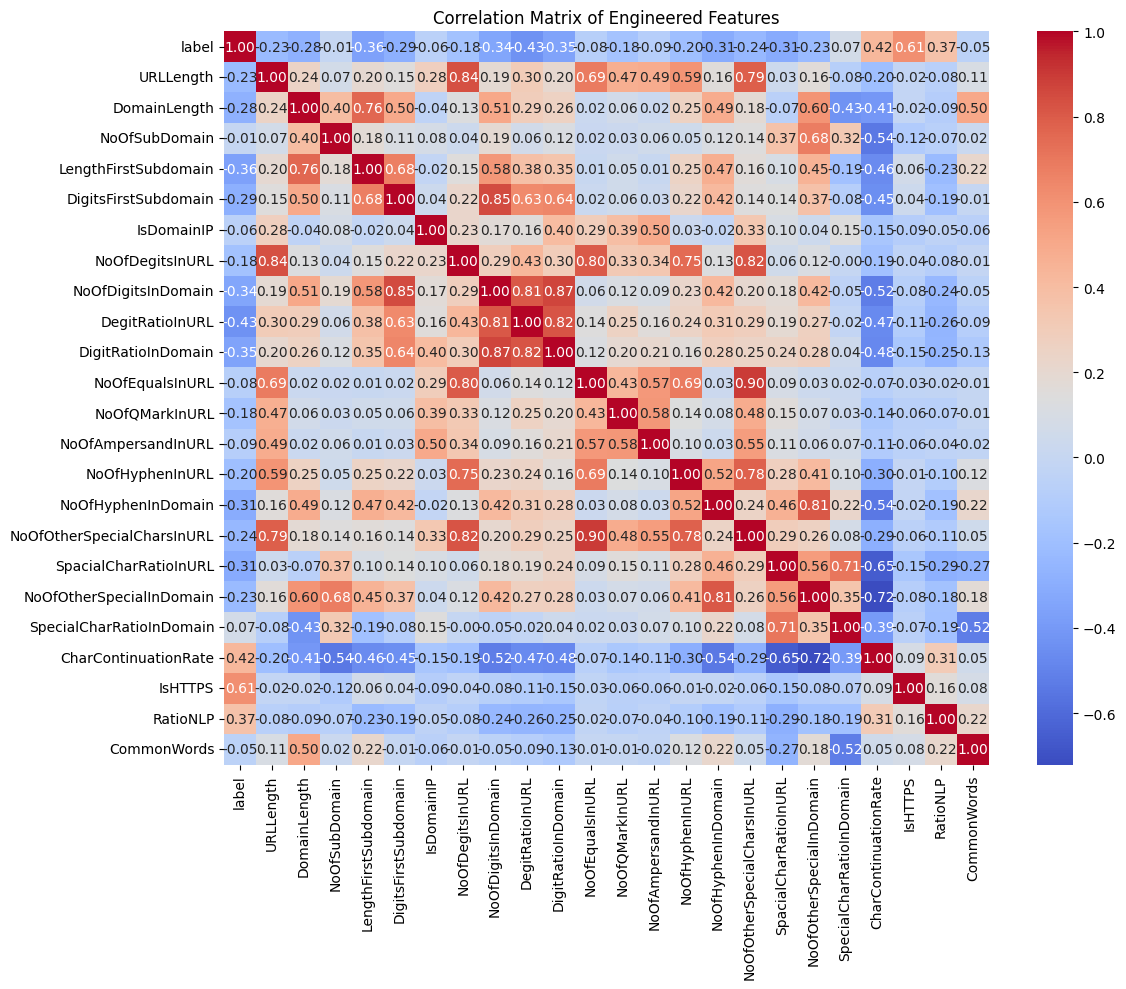

In [83]:
#plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(clean_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engineered Features')
plt.tight_layout()
plt.show()


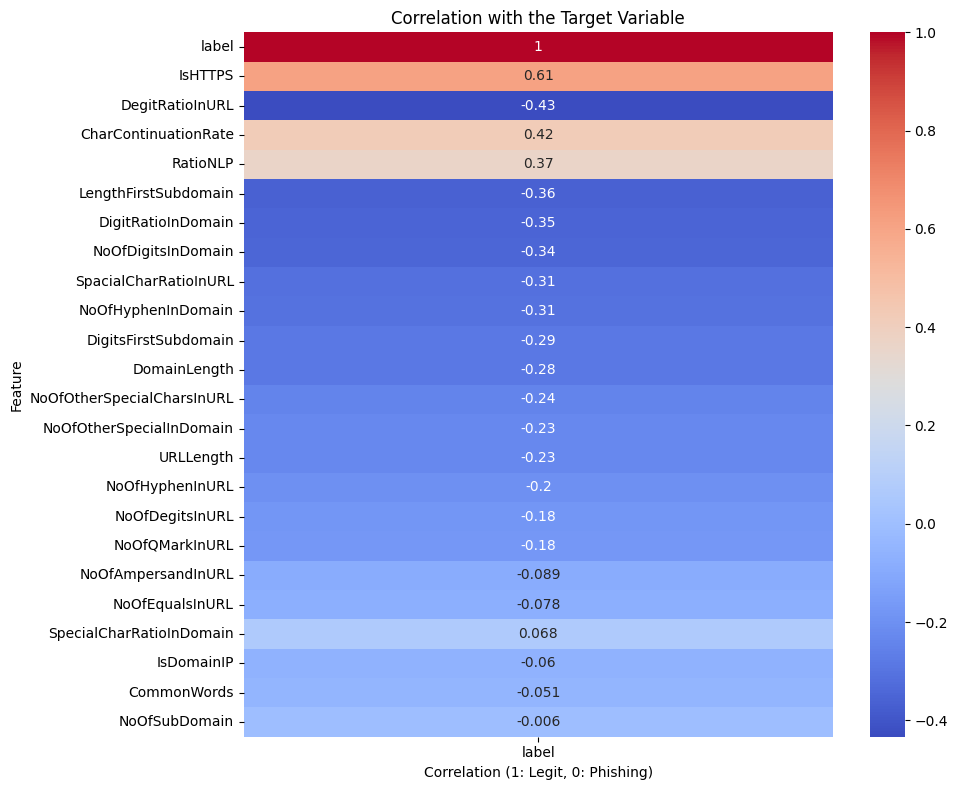

In [84]:
# Show correlation matrix of the label sorted absoulte values
corr = clean_data.corr()['label']

# Sort via absolute values
corr_abs = corr.abs().sort_values(ascending=False)

# Plot single feature correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr[corr_abs.index].to_frame(), cmap='coolwarm', annot=True, cbar=True)
plt.title('Correlation with the Target Variable')
plt.xlabel('Correlation (1: Legit, 0: Phishing)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



### Feature Scaling

Es molt important normalitzar certs atributs cóm 'DomainLength' per a certs tipus de models basats altament sensibles a les magnituds dels atributs (com Logistic Regression), o que estan basats en distàncies. Utilitzarem el StandardScaler

In [85]:
# Standardize (z-score normalization) or normalize features using Min-Max scaling.  Don't scale the binary features.
from sklearn.preprocessing import StandardScaler

# Select only numerical non-binary columns, so all except ['IsDomainIP', 'IsHTTPS', 'label']
numerical_columns_scaler = ['URLLength', 'DomainLength', 'NoOfSubDomain', 'LengthFirstSubdomain',
       'DigitsFirstSubdomain', 'NoOfDegitsInURL',
       'NoOfDigitsInDomain', 'DegitRatioInURL', 'DigitRatioInDomain',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfHyphenInURL', 'NoOfHyphenInDomain', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'NoOfOtherSpecialInDomain',
       'SpecialCharRatioInDomain', 'CharContinuationRate',
       'RatioNLP', 'CommonWords']


# Standardize the numerical features
scaler = StandardScaler()
clean_data_scaled = clean_data.copy()
clean_data_scaled[numerical_columns_scaler] = scaler.fit_transform(clean_data[numerical_columns_scaler])

## Metric Selection
___

Pel que fa a la selecció de metriques, podem pensar que ens iteressaria evitar que un link sospitós de ser phishing arribi a ser considerat com segur, és a dir, prioritzar el recall. No obstant això, cal recordar que al món real la probabilitat de trobar una URL phishing en compraració amb una URL legitima és molt baixa. Per aquest motiu, penso que cal equilibrar el fet de no categoritzar incorrectament una pàgina legitima, ja que és un esdeveniment molt més comú, juntament amb no correr el risc de permetre l'entrada a una web maliciosa. Això em porta a pensar que optimitzar el f1-score és la decisió més adequada. 

## Model Training & Validation
___

En aquest projecte hem usat el dataset en qüestió per entendre millor com són els atacs 'Phishing', suposant que les URL's proposades en el dataset són un subconjunt fideligne a com trobariem les URL's en la realitat. Usarem el propi dataset per entrenar i validar els diferents models.

D'altra banda, per al test, utilitzarem un dataset nou, d'una font **completament diferent** i **amb distribucions diferents**. Aquest pas es realment important ja que volem mirar que tan bé generalitza el nostre model a **URL's de diferents formes**, ja que com bé hem explicar abans, el més probable és que el dataset d'entrenament generarà overfitting degut a certes distribucions esbiaixades dels atributs. 

Començarem l'entrenament mitjançant l'ús de validació creuada. Com tenim més mostres de pàgines legitimes que de phishing, optarem també per utilitzar un Stratified K-Fold.

In [86]:
# Use stratified K-Fold cross-validation to divide the train set
from sklearn.model_selection import StratifiedKFold

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the groundtruth from the features
X_scaled_train = clean_data_scaled.drop(columns=['label']) # Drop the target column

X_train = clean_data.drop(columns=['label']) # Drop the target column
y_train = clean_data['label']

In [87]:
X_train.columns

Index(['URLLength', 'DomainLength', 'NoOfSubDomain', 'LengthFirstSubdomain',
       'DigitsFirstSubdomain', 'IsDomainIP', 'NoOfDegitsInURL',
       'NoOfDigitsInDomain', 'DegitRatioInURL', 'DigitRatioInDomain',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfHyphenInURL', 'NoOfHyphenInDomain', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'NoOfOtherSpecialInDomain',
       'SpecialCharRatioInDomain', 'CharContinuationRate', 'IsHTTPS',
       'RatioNLP', 'CommonWords'],
      dtype='object')

In [88]:
all_feats_ordered = ['URLLength', 'DomainLength', 'NoOfSubDomain', 'LengthFirstSubdomain',
       'DigitsFirstSubdomain', 'IsDomainIP', 'NoOfDegitsInURL',
       'NoOfDigitsInDomain', 'DegitRatioInURL', 'DigitRatioInDomain',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfHyphenInURL', 'NoOfHyphenInDomain', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'NoOfOtherSpecialInDomain',
       'SpecialCharRatioInDomain', 'CharContinuationRate', 'IsHTTPS',
       'RatioNLP', 'CommonWords']

Donat que estem davant d'un problema de classificació binaria, seleccionarem els models: Logistic Regression, Random Forest, XGBoost, LightGBM.

### Models:

### Logistic Regression


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# Define the model
logr = LogisticRegression(random_state=42)

# Get the accuracy scores
cv_scores = cross_val_score(logr, X_scaled_train, y_train, cv=skf, scoring='f1')


# Get the classification report witgh multiple decimals for the metrics
y_pred = cross_val_predict(logr, X_scaled_train, y_train, cv=skf)
report = classification_report(y_train, y_pred)

# Print the results
print('Cross-Validation Scores:', cv_scores)
print('Mean F1 Score:', np.mean(cv_scores))
print('\nClassification Report:\n', report)

# Fit the model
logr.fit(X_scaled_train, y_train)

Cross-Validation Scores: [0.99558593 0.99508971 0.99516284 0.99529234 0.99525489]
Mean F1 Score: 0.9952771409148052

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    100945
           1       0.99      1.00      1.00    134851

    accuracy                           0.99    235796
   macro avg       1.00      0.99      0.99    235796
weighted avg       0.99      0.99      0.99    235796



LogisticRegression(random_state=42)

### Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=skf, scoring='f1')

# Get the classification report
y_pred_rf = cross_val_predict(rf, X_train, y_train, cv=skf)
report = classification_report(y_train, y_pred_rf)

# Print the results
print('Cross-Validation Scores:', cv_scores)
print('Mean F1 Score:', np.mean(cv_scores))
print('\nClassification Report:\n', report)

# Fit the model
rf.fit(X_train, y_train)


Cross-Validation Scores: [0.99805667 0.99798234 0.99818519 0.99807429 0.99794524]
Mean F1 Score: 0.998048745753748

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100945
           1       1.00      1.00      1.00    134851

    accuracy                           1.00    235796
   macro avg       1.00      1.00      1.00    235796
weighted avg       1.00      1.00      1.00    235796



RandomForestClassifier(random_state=42)

### XGBoost

Per aquest model, primer trobem els hiperparametres.

In [91]:
'''
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5],
    'min_child_weight': [1, 4],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, 
                           cv=skf, n_jobs=-1, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)
'''

'\nfrom xgboost import XGBClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid for XGBoost\nparam_grid_xgb = {\n    \'n_estimators\': [50, 100, 200],\n    \'learning_rate\': [0.01, 0.2],\n    \'max_depth\': [3, 5],\n    \'min_child_weight\': [1, 4],\n    \'subsample\': [0.8, 0.9],\n    \'colsample_bytree\': [0.8, 0.9]}\n\n# Initialize the XGBoost classifier\nxgb = XGBClassifier(random_state=42)\n\n# Initialize GridSearchCV\ngrid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, \n                           cv=skf, n_jobs=-1, verbose=1, scoring=\'f1\')\n\n# Fit the grid search to the data\ngrid_search_xgb.fit(X_train, y_train)\n\n# Print the best parameters and the best score\nprint("Best Parameters:", grid_search_xgb.best_params_)\nprint("Best Score:", grid_search_xgb.best_score_)\n'

In [92]:
from xgboost import XGBClassifier

# Define best hyperparameters for the previous xgboost 'xgb' {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}

# Perform cross-validation
xgb = XGBClassifier(random_state=42, **best_params)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=skf, scoring='precision')

# Get the classification report
y_pred = cross_val_predict(xgb, X_train, y_train, cv=skf)
report = classification_report(y_train, y_pred)

# Print the results
print('Cross-Validation Scores:', cv_scores)
print('Mean F1 Score:', np.mean(cv_scores))
print('\nClassification Report:\n', report)

xgb.fit(X_train, y_train)

Cross-Validation Scores: [0.99637882 0.99641577 0.99700466 0.99682023 0.99656243]
Mean F1 Score: 0.9966363825420048

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100945
           1       1.00      1.00      1.00    134851

    accuracy                           1.00    235796
   macro avg       1.00      1.00      1.00    235796
weighted avg       1.00      1.00      1.00    235796



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### LightGBM

In [93]:
'''
# Import grid search
from sklearn.model_selection import GridSearchCV

# Find best parameters for LightGBM:

from lightgbm import LGBMClassifier

# Define the parameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5],
    'num_leaves': [10, 20],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Initialize the LightGBM classifier
lgbm = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, 
                           cv=skf, n_jobs=-1, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search_lgbm.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search_lgbm.best_params_)
print("Best Score:", grid_search_lgbm.best_score_)
'''

'\n# Import grid search\nfrom sklearn.model_selection import GridSearchCV\n\n# Find best parameters for LightGBM:\n\nfrom lightgbm import LGBMClassifier\n\n# Define the parameter grid for LightGBM\nparam_grid_lgbm = {\n    \'n_estimators\': [100, 500],\n    \'learning_rate\': [0.01, 0.2],\n    \'max_depth\': [3, 5],\n    \'num_leaves\': [10, 20],\n    \'subsample\': [0.8, 0.9],\n    \'colsample_bytree\': [0.8, 0.9]\n}\n\n# Initialize the LightGBM classifier\nlgbm = LGBMClassifier(random_state=42)\n\n# Initialize GridSearchCV\ngrid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, \n                           cv=skf, n_jobs=-1, verbose=1, scoring=\'f1\')\n\n# Fit the grid search to the data\ngrid_search_lgbm.fit(X_train, y_train)\n\n# Print the best parameters and the best score\nprint("Best Parameters:", grid_search_lgbm.best_params_)\nprint("Best Score:", grid_search_lgbm.best_score_)\n'

In [94]:
# Use lightGBM
from lightgbm import LGBMClassifier

# Define the model with 300 leaves and binary objective
lgbm = LGBMClassifier(n_estimators=500, objective='binary', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=skf, scoring='f1')

# Get the classification report
y_pred_lgbm = cross_val_predict(lgbm, X_train, y_train, cv=skf)
# Fit the model
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 107880, number of negative: 80756
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2176
[LightGBM] [Info] Number of data points in the train set: 188636, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.571895 -> initscore=0.289587
[LightGBM] [Info] Start training from score 0.289587
[LightGBM] [Info] Number of positive: 107881, number of negative: 80756
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2179
[LightGBM] [Info] Number of data points in the train set: 188637, number of used features: 23
[LightGBM] [Info

LGBMClassifier(n_estimators=500, objective='binary', random_state=42)

In [95]:
# Print the results
print('Cross-Validation Scores:', cv_scores)
print('Mean F1 Score:', np.mean(cv_scores))
print('\nClassification Report:\n', classification_report(y_train, y_pred_lgbm))

Cross-Validation Scores: [0.99800118 0.99803813 0.99824103 0.99814842 0.99800074]
Mean F1 Score: 0.9980859016547905

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100945
           1       1.00      1.00      1.00    134851

    accuracy                           1.00    235796
   macro avg       1.00      1.00      1.00    235796
weighted avg       1.00      1.00      1.00    235796



El rendiment dels model én els conjunts de validació sembla excelent amb els atributs que hem creat. Obtenim f1-scores casi perfectes (0.99) i robustos. 

## Model Testing
___

Ja que hem obtingut resultats excelents a la validació, penso que podem passar directament a veure la preformance en el test. 

Aquest dataset l'hem obtingut d'una font diferent ([MendleyData](https://data.mendeley.com/datasets/vfszbj9b36/1)). Aquest **només** conté l'URL i l'atribut target. Mirem-lo per sobre:

In [96]:
test_data = pd.read_csv('data/test_dataset.csv')
print("Dimensions de test_data: ", test_data.shape)

Dimensions de test_data:  (450176, 2)


In [97]:
test_data.head(5)

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [98]:
test_data.tail(5)

,url,type
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing
450174,http://atualizapj.com/,phishing
450175,http://writeassociate.com/test/Portal/inicio/I...,phishing


### Test Preprocessing

Haurem de processar el dataset per a que pugui ser utilitzat pels models. Començarem pels atributs 'url' i 'type'. El formatejarem de forma correcta per 'URL' i 'label'

In [99]:
test_data.rename(columns={'url': 'URL'}, inplace=True)
test_data.rename(columns={'type': 'label'}, inplace=True)

test_data['label'] = test_data['label'].apply(lambda x: 0 if x == 'phishing' else 1)

In [100]:
# Check if there exists URLS in the training set that are also in the test set
common_urls = set(data['URL']).intersection(set(test_data['URL']))
print("Removed URLs between train and test sets:", len(common_urls))

# Remove the common URLs from the training set
test_data = test_data[~test_data['URL'].isin(common_urls)]

Removed URLs between train and test sets: 428


Continuem extraient l'atribut Host ('Domain'), 'FirstSubDomain' i 'CoreDomain' a partir de l'URL.

In [101]:
from urllib.parse import urlparse

# Function to extract the domain, keeping 'www.' if present
def extract_domain(url):
    parsed_url = urlparse(url)
    # Extract the netloc (domain with 'www.' if present)
    netloc = parsed_url.netloc
    # Remove 'www.' if needed (optional: only include if you want it retained explicitly)
    if netloc.startswith('www.'):
        return netloc
    else:
        return netloc

# Apply the function to create the 'domain' and 'FirstSubDomain' feature
test_data['Domain'] = test_data['URL'].apply(extract_domain)
test_data['FirstSubDomain'] = test_data['Domain'].apply(lambda x: x.split('.')[0] if len(x.split('.')) > 2 else "")
test_data['CoreDomain'] = test_data['Domain'].apply(extract_core_domain)

print(test_data.head(3))

                        URL  label            Domain FirstSubDomain CoreDomain
0    https://www.google.com      1    www.google.com            www     google
1   https://www.youtube.com      1   www.youtube.com            www    youtube
2  https://www.facebook.com      1  www.facebook.com            www   facebook


Ara completarem la resta d'atributs:

In [102]:
test_data['URLLength'] = test_data['URL'].apply(len)
test_data['DomainLength'] = test_data['Domain'].apply(len)
test_data['NoOfSubDomain'] = test_data['Domain'].apply(lambda x: len(x.split('.')) - 2)
test_data['LengthFirstSubdomain'] = test_data['FirstSubDomain'].apply(len)
test_data['DigitsFirstSubdomain'] = test_data['FirstSubDomain'].apply(lambda x: sum(c.isdigit() for c in x))
test_data['IsDomainIP'] = test_data['Domain'].apply(is_ip_address)
test_data['NoOfDegitsInURL'] = test_data['URL'].apply(lambda x: sum(c.isdigit() for c in x))
test_data['NoOfDigitsInDomain'] = test_data['Domain'].apply(lambda x: sum(c.isdigit() for c in x))
test_data['DegitRatioInURL'] = test_data['NoOfDegitsInURL'] / test_data['URLLength']
test_data['DigitRatioInDomain'] = test_data['NoOfDigitsInDomain'] / test_data['DomainLength']
test_data['NoOfEqualsInURL'] = test_data['URL'].apply(lambda x: x.count('='))
test_data['NoOfQMarkInURL'] = test_data['URL'].apply(lambda x: x.count('?'))
test_data['NoOfAmpersandInURL'] = test_data['URL'].apply(lambda x: x.count('&'))
test_data['NoOfHyphenInURL'] = test_data['URL'].apply(lambda x: x.count('-'))
test_data['NoOfHyphenInDomain'] = test_data['Domain'].apply(lambda x: x.count('-'))
test_data['NoOfOtherSpecialCharsInURL'] = test_data['URL'].apply(count_other_special_chars_url)
test_data['SpacialCharRatioInURL'] = test_data['NoOfOtherSpecialCharsInURL'] / test_data['URLLength']
test_data['NoOfOtherSpecialInDomain'] = test_data['Domain'].apply(count_other_special_chars_domain)
test_data['SpecialCharRatioInDomain'] = test_data['NoOfOtherSpecialInDomain'] / test_data['DomainLength']
test_data['CharContinuationRate'] = test_data['Domain'].apply(calculate_char_continuation_rate)
test_data['IsHTTPS'] = test_data['URL'].apply(lambda x: 1 if x.startswith('https') else 0)

In [103]:
# Add the NLP features
test_data[['RatioNLP', 'CommonWords']] = test_data['CoreDomain'].apply(
    lambda x: pd.Series(compute_ratio(x))
)

Aquests atributs han sigut aplicats exactament igual que en la part anterior. Això pot ser perillos ja que si el format d'alguna URL present en el dataset test és incorrecte o diferent al esperat, podria introduir valors incorrectes (com numeros negatius o Missing values). Anem a verificar que el preprocessament s'ha realitzat amb exit: 

In [104]:
# Check for missing values or NaNs
count_of_missing_values = test_data.isnull().sum().sum()
print("Number of missing values in test_data:", count_of_missing_values)

# Delete the rows with missing values
test_data = test_data.dropna()

Number of missing values in test_data: 6


6 files tenen missing values. Les eliminarem.

Seguirem la verificació analitzant superficialment els atributs.

In [105]:
test_data.describe()

,label,URLLength,DomainLength,NoOfSubDomain,LengthFirstSubdomain,DigitsFirstSubdomain,IsDomainIP,NoOfDegitsInURL,NoOfDigitsInDomain,DegitRatioInURL,...,NoOfHyphenInURL,NoOfHyphenInDomain,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,NoOfOtherSpecialInDomain,SpecialCharRatioInDomain,CharContinuationRate,IsHTTPS,RatioNLP,CommonWords
count,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,...,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000,449745.000000
mean,0.767866,60.271916,19.298482,1.121131,3.058195,0.062942,0.006406,4.197994,0.269926,0.055710,...,1.253072,0.083727,7.545309,0.122882,2.210046,0.119545,0.946178,0.782268,2.404997,1.509364
std,0.422194,37.572880,6.690315,0.671126,2.556267,0.566703,0.079780,9.225469,1.547543,0.081211,...,2.571468,0.374869,5.238953,0.027666,0.781937,0.036599,0.090197,0.412705,2.173331,0.969971
min,0.000000,12.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000
25%,1.000000,40.000000,15.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.105263,2.000000,0.093750,0.894737,1.000000,0.953125,1.000000
50%,1.000000,53.000000,18.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.014925,...,0.000000,0.000000,6.000000,0.122449,2.000000,0.117647,1.000000,1.000000,1.901961,1.000000
75%,1.000000,71.000000,22.000000,1.000000,3.000000,0.000000,0.000000,6.000000,0.000000,0.088235,...,1.000000,0.000000,9.000000,0.139535,3.000000,0.142857,1.000000,1.000000,3.313725,2.000000
max,1.000000,2314.000000,240.000000,19.000000,62.000000,34.000000,1.000000,631.000000,105.000000,0.810013,...,42.000000,21.000000,209.000000,0.874477,27.000000,1.000000,1.000000,1.000000,18.000000,18.000000


De la taula anterior destaca que existeixen valors negatius del atribut Número de subdominis 'NoOfSubDomain'. Evidentment això no pot passar, per tant anem a veure el format d'aquestes URLs i perquè passa.

In [106]:
# Filter rows where NoOfSubDomain is less than 0
weird_data = test_data[test_data['NoOfSubDomain'] < 0]
print("Number of rows with NoOfSubDomain < 0:", weird_data.shape[0])
weird_data.head(10)

Number of rows with NoOfSubDomain < 0: 167


,URL,label,Domain,FirstSubDomain,CoreDomain,URLLength,DomainLength,NoOfSubDomain,LengthFirstSubdomain,DigitsFirstSubdomain,...,NoOfHyphenInURL,NoOfHyphenInDomain,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,NoOfOtherSpecialInDomain,SpecialCharRatioInDomain,CharContinuationRate,IsHTTPS,RatioNLP,CommonWords
354250,http://http://www.oilchangeasheville.com/https...,0,http:,,http,113,5,-1,0,0,...,0,0,16,0.141593,1,0.200000,1.0,0,4.0,1.0
355128,http://http://leticiaaraujo.com.br/VAN-GOG.969...,0,http:,,http,243,5,-1,0,0,...,1,0,39,0.160494,1,0.200000,1.0,0,4.0,1.0
355141,http://http://leticiaaraujo.com.br/VAN-GOG.969...,0,http:,,http,241,5,-1,0,0,...,1,0,39,0.161826,1,0.200000,1.0,0,4.0,1.0
355880,http://http://www.ime.edu.co/firmasime/Santand...,0,http:,,http,129,5,-1,0,0,...,1,0,27,0.209302,1,0.200000,1.0,0,4.0,1.0
355921,http://http://allatacadista.com.br/web/ipad/me...,0,http:,,http,143,5,-1,0,0,...,4,0,29,0.202797,1,0.200000,1.0,0,4.0,1.0
355942,http://http://www.rainbowfarmsonline.com/Butto...,0,http:,,http,125,5,-1,0,0,...,0,0,24,0.192000,1,0.200000,1.0,0,4.0,1.0
356133,"http://http://www.ogrob.org/240972,81/index22....",0,http:,,http,50,5,-1,0,0,...,0,0,9,0.180000,1,0.200000,1.0,0,4.0,1.0
356702,http://http://186.67.93.102/signin/de/cgi-bin/...,0,http:,,http,295,5,-1,0,0,...,2,0,70,0.237288,1,0.200000,1.0,0,4.0,1.0
356771,http://https://thoaimedia.com/save/index.php?e...,0,https:,,https,178,6,-1,0,0,...,1,0,30,0.168539,1,0.166667,1.0,0,5.0,1.0
357512,"http://http://sgademexico.com/tmp/Inc,Dropbox/...",0,http:,,http,56,5,-1,0,0,...,0,0,10,0.178571,1,0.200000,1.0,0,4.0,1.0


Observem que hi ha 167 amb un certificat SSL doble ("http://http://..."). Això vol dir que són URL mal emmagatzemades, i que el nostre feature engineering no ha interpretat. Donat que són 167 de 450.000 les eliminarem.

In [107]:
# Delete the weird data
test_data = test_data[test_data['NoOfSubDomain'] >= 0]
print("Number of rows after removing weird data:", test_data.shape[0])

Number of rows after removing weird data: 449578


Una cosa que he pensat que podria passar és que un mateix domini, (com www.google.com), tingui tant l'etiqueta phishing com l'etiqueta legit. Això evidentment no té sentit. Anem a comprovar-ho

In [108]:
# Check for rows with the same domain but different labels
duplicate_domains = test_data.groupby('Domain')['label'].nunique()

# Display the duplicate domains
print("Duplicate Domains with Different Labels:")
duplicate_domains[duplicate_domains > 1].head(10)

Duplicate Domains with Different Labels:


Domain
code.google.com         2
feeds.feedburner.com    2
home.earthlink.net      2
sites.google.com        2
twitter.com             2
www.4shared.com         2
www.academia.edu        2
www.adf.ly              2
www.ancestry.com        2
www.angelfire.com       2
Name: label, dtype: int64

En especial, el que sol passar és que són dominis legitms mal etiquetats. Per aquests motius, eliminarem tots els dominis amb labels inconsistents que siguin de phishing, deixant només les legitimes.

In [109]:
inc_dom_indx = duplicate_domains[duplicate_domains > 1].index
# For each row from duplicate_domains get domain, and label is 0, and delete the row.
test_data = test_data[~test_data['Domain'].isin(inc_dom_indx) | (test_data['label'] == 1)]
print("Number of rows after removing weird data:", test_data.shape[0])

Number of rows after removing weird data: 448210


In [110]:
# Print test data label distribution
print(test_data['label'].value_counts())

label
1    345344
0    102866
Name: count, dtype: int64


### Test Evaluation
Anem a veure el rendiment del millor model que hem entrenat abans, XGboost, amb dades noves. 


In [111]:
test_data.columns

Index(['URL', 'label', 'Domain', 'FirstSubDomain', 'CoreDomain', 'URLLength',
       'DomainLength', 'NoOfSubDomain', 'LengthFirstSubdomain',
       'DigitsFirstSubdomain', 'IsDomainIP', 'NoOfDegitsInURL',
       'NoOfDigitsInDomain', 'DegitRatioInURL', 'DigitRatioInDomain',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfHyphenInURL', 'NoOfHyphenInDomain', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'NoOfOtherSpecialInDomain',
       'SpecialCharRatioInDomain', 'CharContinuationRate', 'IsHTTPS',
       'RatioNLP', 'CommonWords'],
      dtype='object')

In [112]:
X_test = test_data[all_feats_ordered]

In [113]:
# Use standard scaler for logistic regression

X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns_scaler] = scaler.transform(X_test_scaled[numerical_columns_scaler])
X_test_scaled = X_test_scaled[all_feats_ordered]

y_test = test_data['label']

In [114]:
from sklearn.metrics import f1_score

# Predict using the best model
y_pred = xgb.predict(X_test)

# Get the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Print f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.23      1.00      0.38    102866
           1       0.99      0.01      0.02    345344

    accuracy                           0.24    448210
   macro avg       0.61      0.50      0.20    448210
weighted avg       0.82      0.24      0.10    448210

F1 Score: 0.01537161968027031


El rendiment és **lamentable**, tenim un F1-Score de 0.015, donat que en la validació obteniem aprop del 99% f1-score. 

### ¿Que ha passat?

Anem a pensar perqué el model no està funcionant com esperavem **sense fer observacions ni analísi sobre el dataset test**: Com bé hem explicat abans, la forma d'una URL legítima pot variar molt segons la seva finalitat. Per exemple, si estem fent una cerca en la pagina web, pot existir una query que fagi que l'URL sigui més llarga, o si el . En el nostre cas, segons l'anàlisi fet en l'apartat d'Exploratory Data Analysis, no hi ha aquest tipus de mostres en el dataset, pel que la realitat que li estem ensenyant no és fideligna. Observant les feature importances dels apartats anteriors, es probable que hi hagui overfitting ja que li estem ensenyant que classifiqui valorant en especial la llargada de l'URL. 

El que pot solucionar aquest problema és ensenyar-li al model que es desentengui parcialment de la llargada d'URL's ja que està extraient conclusions equivocades d'aquests atribut, (i tots els que estan altament relacionats amb ell). El que proposo per solucionar és fixarnos en la llongitud del domini. Això ho fem per varis motius:
* El domini no varia depenent de l'ubicació de l'usuari en la pàgina web.
* L'assignació d'un domini és un procediment que costa diners, per tant, els atacants que intentar crear pàgines malicioses probablement s'hagin de refugiar en dominis gratuits, que solen tenir una forma molt característica a l'hora de detectar-les.

Això ens porta a concloure que haurem de rebutjar els atributs que utilitzin "URLLength" a l'hora de l'entrenament i usar l'informació del domini. Aquest insight és molt bó ja que en la majoria de la literatura actual no és té en consideració aquest fet.


Anem a provar-ho:

### Re-training 

Agafarem les features que no incloguin una correlació amb URL Length:

In [115]:
new_feats = ['DigitsFirstSubdomain', 'LengthFirstSubdomain','IsDomainIP', 'NoOfDigitsInDomain', 'DigitRatioInDomain',
       'NoOfHyphenInDomain', 'NoOfOtherSpecialInDomain', 'SpecialCharRatioInDomain', 'CharContinuationRate', 'IsHTTPS',
       'RatioNLP', 'CommonWords']

Reentrenem i validem models:

#### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# Define the model
logr = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(logr, X_scaled_train[new_feats], y_train, cv=skf, scoring='f1')

# Get the classification report
y_pred = cross_val_predict(logr, X_scaled_train[new_feats], y_train, cv=skf)
report = classification_report(y_train, y_pred)

# Print the results
print('Cross-Validation Scores:', cv_scores)
print('Mean F1 Score:', np.mean(cv_scores))
print('\nClassification Report:\n', report)

# Re-fit the model
logr.fit(X_scaled_train[new_feats], y_train)

Cross-Validation Scores: [0.97863757 0.9799325  0.97941813 0.97887156 0.97919378]
Mean F1 Score: 0.9792107087978634

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    100945
           1       0.97      0.99      0.98    134851

    accuracy                           0.98    235796
   macro avg       0.98      0.97      0.98    235796
weighted avg       0.98      0.98      0.98    235796



LogisticRegression(random_state=42)

#### XGBoost

In [118]:
# Define best hyperparameters for the previous xgboost 'xgb' {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}

# Perform cross-validation
xgb = XGBClassifier(random_state=42, **best_params)
cv_scores = cross_val_score(xgb, X_train[new_feats], y_train, cv=skf, scoring='f1')

# Get the classification report
y_pred = cross_val_predict(xgb, X_train[new_feats], y_train, cv=skf)
report = classification_report(y_train, y_pred)

# Print the results
print('Cross-Validation Scores:', cv_scores)
print('Mean F1 Score:', np.mean(cv_scores))
print('\nClassification Report:\n', report)

# Re-fit the model
xgb.fit(X_train[new_feats], y_train)

Cross-Validation Scores: [0.99296501 0.99340238 0.99287122 0.99289003 0.9927607 ]
Mean F1 Score: 0.9929778688978994

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    100945
           1       0.99      1.00      0.99    134851

    accuracy                           0.99    235796
   macro avg       0.99      0.99      0.99    235796
weighted avg       0.99      0.99      0.99    235796



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### LGBM

In [125]:
# Train LightGBM with the new features
# Define the model with 300 leaves and binary objective
lgbm = LGBMClassifier(n_estimators=500, objective='binary', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lgbm, X_train[new_feats], y_train, cv=skf, scoring='f1')

# Get the classification report
y_pred_lgbm = cross_val_predict(lgbm, X_train[new_feats], y_train, cv=skf)

# Fit the model
lgbm.fit(X_train[new_feats], y_train)

[LightGBM] [Info] Number of positive: 107880, number of negative: 80756
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 188636, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.571895 -> initscore=0.289587
[LightGBM] [Info] Start training from score 0.289587
[LightGBM] [Info] Number of positive: 107881, number of negative: 80756
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 188637, number of used features: 12
[LightGBM] [Info

LGBMClassifier(n_estimators=500, objective='binary', random_state=42)

In [82]:
# Print the results
print('Cross-Validation Scores:', cv_scores)
print('Mean F1 Score:', np.mean(cv_scores))
print('\nClassification Report:\n', classification_report(y_train, y_pred_lgbm))

Cross-Validation Scores: [0.99303251 0.99343585 0.99308794 0.99299565 0.99292192]
Mean F1 Score: 0.9930947753350919

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    100945
           1       0.99      1.00      0.99    134851

    accuracy                           0.99    235796
   macro avg       0.99      0.99      0.99    235796
weighted avg       0.99      0.99      0.99    235796



#### Random Forest Classifier

In [119]:
# Re-Define the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train[new_feats], y_train, cv=skf, scoring='f1')

# Get the classification report
y_pred_rf = cross_val_predict(rf, X_train[new_feats], y_train, cv=skf)
report = classification_report(y_train, y_pred_rf)

# Print the results
print('Cross-Validation Scores:', cv_scores)
print('Mean F1 Score:', np.mean(cv_scores))
print('\nClassification Report:\n', report)

# Fit the model
rf.fit(X_train[new_feats], y_train)

Cross-Validation Scores: [0.9931421  0.99362    0.99282883 0.99268027 0.9928283 ]
Mean F1 Score: 0.9930199021385905

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    100945
           1       0.99      1.00      0.99    134851

    accuracy                           0.99    235796
   macro avg       0.99      0.99      0.99    235796
weighted avg       0.99      0.99      0.99    235796



RandomForestClassifier(random_state=42)

## Model Results
___

### Random Forest

In [121]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

# Predict using random forest and 0.9 threshold
y_pred_rf = (rf.predict_proba(X_test[new_feats])[:, 0] < 0.9).astype(int)

# Print the classification report
report = classification_report(y_test, y_pred_rf)

# Print the f1 score
f1 = f1_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)


print(report)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    102866
           1       1.00      1.00      1.00    345344

    accuracy                           1.00    448210
   macro avg       1.00      1.00      1.00    448210
weighted avg       1.00      1.00      1.00    448210

F1 Score: 0.9977904488313705
Recall: 0.9977182171979244
Precision: 0.9978626909242558
Accuracy: 0.9965953459315946


En efecte, la nostra hipotesi era certa. Els atributs derivats de URLLength provocaven overfitting. El f1-score (0.9977) ara correspon al que hem observat en la darrera part de validació i reentrenament.  

### XGBoost

In [122]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

# Predict using random forest and 0.9 threshold
y_pred_xgb = (xgb.predict_proba(X_test[new_feats])[:, 0] < 0.9).astype(int)

# Print the classification report
report = classification_report(y_test, y_pred_xgb)

# Print the f1 score
f1 = f1_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
accurac = accuracy_score(y_test, y_pred_xgb)

print(report)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Accuracy Score:", accurac)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    102866
           1       1.00      1.00      1.00    345344

    accuracy                           1.00    448210
   macro avg       0.99      0.99      0.99    448210
weighted avg       1.00      1.00      1.00    448210

F1 Score: 0.9972312172646861
Recall Score: 0.9965194125277984
Precision Score: 0.9979440395997112
Accuracy Score: 0.9957363735748868


### Logistic Regression

In [123]:
# Get recall metric

# Predict using random forest and 0.9 threshold
y_pred_logr = (logr.predict_proba(X_test_scaled[new_feats])[:, 0] < 0.9).astype(int)

# Print the classification report
report = classification_report(y_test, y_pred_logr)

# Print the f1 score
f1 = f1_score(y_test, y_pred_logr)
recall = recall_score(y_test, y_pred_logr)
precision = precision_score(y_test, y_pred_logr)

print(report)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Accuracy Score:", accuracy_score(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    102866
           1       0.99      1.00      0.99    345344

    accuracy                           0.99    448210
   macro avg       0.99      0.98      0.99    448210
weighted avg       0.99      0.99      0.99    448210

F1 Score: 0.9946112927556315
Recall Score: 0.9975734340252038
Precision Score: 0.9916666906543159
Accuracy Score: 0.99167131478548


### LightGBM

In [126]:
# Test lightGBM model
y_pred_lgbm = (lgbm.predict_proba(X_test[new_feats])[:, 0] < 0.85).astype(int)

# Print the classification report
report = classification_report(y_test, y_pred_lgbm)

# Print the f1 score
f1 = f1_score(y_test, y_pred_lgbm)
recall = recall_score(y_test, y_pred_lgbm)
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(report)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("Accuracy Score:", accuracy)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    102866
           1       1.00      0.99      1.00    345344

    accuracy                           0.99    448210
   macro avg       0.99      0.99      0.99    448210
weighted avg       0.99      0.99      0.99    448210

F1 Score: 0.996170838615352
Recall Score: 0.9943795172349889
Precision Score: 0.9916666906543159
Accuracy Score: 0.994109903839718


### Confusion Matrix

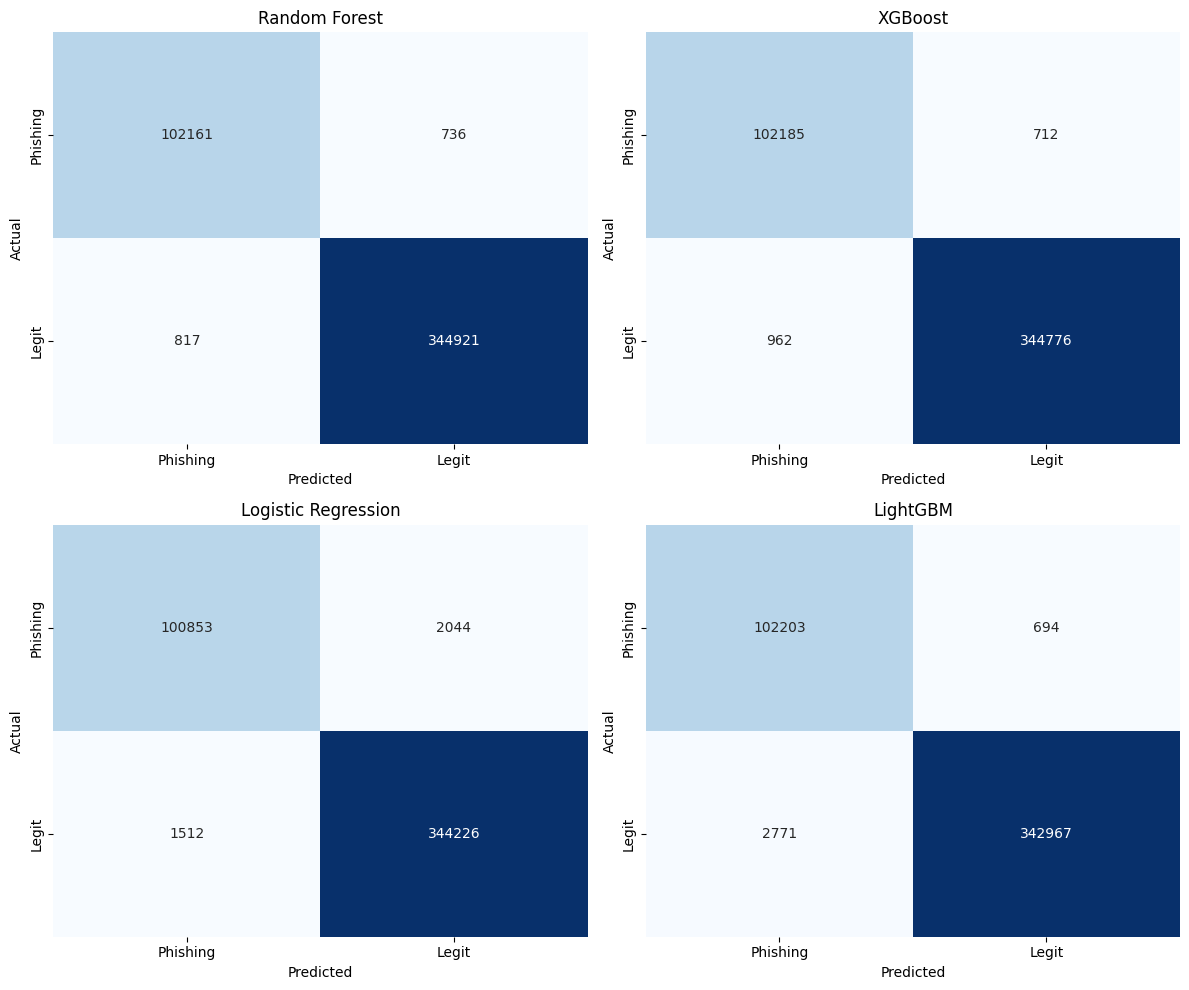

In [314]:
# Show the previous three confusion matrix in a single plot for comparison
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_logr = confusion_matrix(y_test, y_pred_logr)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Plot  confusion matrix using subplots with 2 up and 2 down and sns.heatmap. Do not show the lateral bar label: this is done by setting cbar=False
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'], ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('Random Forest')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# XGBoost
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'], ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('XGBoost')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Logistic Regression
sns.heatmap(conf_matrix_logr, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'], ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('Logistic Regression')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# LightGBM
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'], ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('LightGBM')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Observem que:

### AUC-ROC Curves

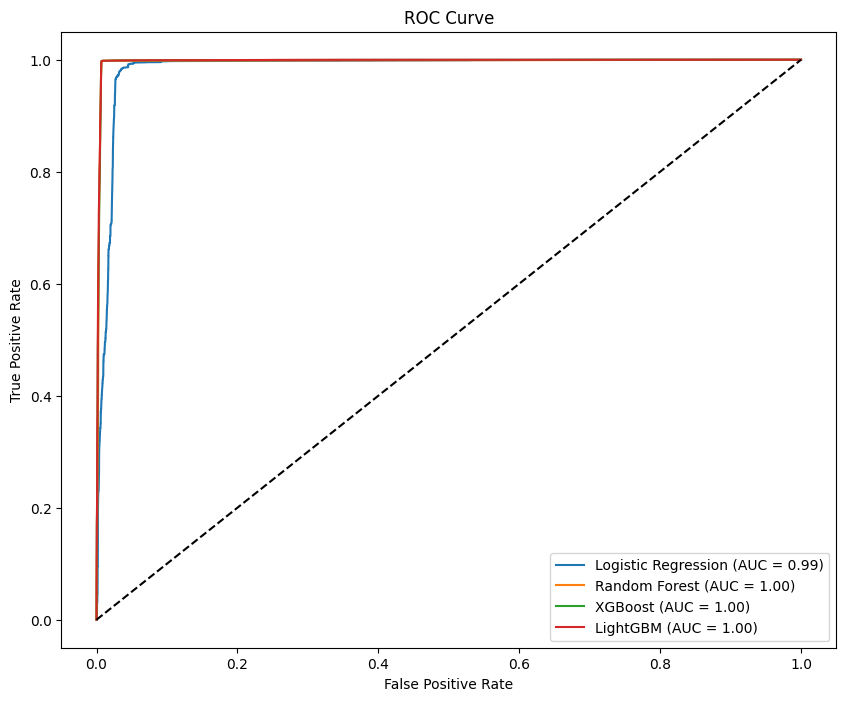

In [127]:
# Visualize auc_roc curve for the three models in a single plot with sns

from sklearn.metrics import roc_curve, auc

y_logr = logr.predict_proba(X_test[new_feats])[:, 1]
y_rf = rf.predict_proba(X_test[new_feats])[:, 1]
y_xgb = xgb.predict_proba(X_test[new_feats])[:, 1]
y_lgbm = lgbm.predict_proba(X_test[new_feats])[:, 1]

# Use roc_curve
fpr_logr, tpr_logr, _ = roc_curve(y_test, y_logr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_xgb)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_lgbm)
    
auc_score_logr = auc(fpr_logr, tpr_logr)
auc_score_rf = auc(fpr_rf, tpr_rf)
auc_score_xgb = auc(fpr_xgb, tpr_xgb)
auc_score_lgbm = auc(fpr_lgbm, tpr_lgbm)

#Plot using SeaBorn
plt.figure(figsize=(10, 8))
plt.plot(fpr_logr, tpr_logr, label=f"Logistic Regression (AUC = {auc_score_logr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_score_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_score_xgb:.2f})")
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {auc_score_lgbm:.2f})")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Random Model

In [326]:
# Generate random predictions with different thresholds
thresholds = np.arange(0.05, 0.95, 0.15)

# Initialize variables to store the best threshold and F1 score
best_f1_random = 0
best_threshold = 0
best_thresholds = []
best_f1s = []
y_best_pred_random = None

# Classify based on the threshold
for threshold in thresholds:
    # Generate random predictions based on threshold
    y_pred_random = (np.random.rand(len(y_test)) < threshold).astype(int)
    
    # Calculate F1 score for random predictions
    f1_random = f1_score(y_test, y_pred_random)
    
    # Store the threshold and F1 score
    best_thresholds.append(threshold)
    best_f1s.append(f1_random)

    # Update best threshold and F1 score if this F1 score is better
    if f1_random > best_f1_random:
        best_f1_random = f1_random
        best_threshold = threshold
        y_best_pred_random = y_pred_random

# Sort best_thresholds and best_f1s in descending order of F1 scores
sorted_indices = np.argsort(best_f1s)[::-1]
sorted_best_thresholds = np.array(best_thresholds)[sorted_indices]
sorted_best_f1s = np.array(best_f1s)[sorted_indices]

# Print the results
print("Best F1 Score:", best_f1_random)
print("Best Threshold:", best_threshold)
print("All F1 Scores (sorted):", sorted_best_f1s[:5])
print("All Thresholds (sorted):", sorted_best_thresholds[:5])

# Print precision, recall, and accuracy
precision_random = precision_score(y_test, y_best_pred_random)
recall_random = recall_score(y_test, y_best_pred_random)
accuracy_random = accuracy_score(y_test, y_best_pred_random)

print("Precision:", precision_random)
print("Recall:", recall_random)
print("Accuracy:", accuracy_random)



Best F1 Score: 0.7849083045743457
Best Threshold: 0.8000000000000002
All F1 Scores (sorted): [0.7849083  0.7055397  0.60511967 0.48107336 0.31711295]
All Thresholds (sorted): [0.8  0.65 0.5  0.35 0.2 ]
Precision: 0.7701379784500876
Recall: 0.8002562634133361
Accuracy: 0.6619991752761153


Adicionalment, podem verificar la robustesa del nostre model amb el precision, recall, and F1-score per a la classe minoritaria de Phishing:

In [322]:
# Calculate precision, recall, and F1-score for the phishing class
precision_phishing = precision_score(y_test, y_pred_rf, pos_label=0)
recall_phishing = recall_score(y_test, y_pred_rf, pos_label=0)

# Calculate F1-score for the phishing class
f1_phishing = f1_score(y_test, y_pred_rf, pos_label=0)

# Print the results
print("Precision for Phishing Class:", precision_phishing)
print("Recall for Phishing Class:", recall_phishing)
print("F1 Score for Phishing Class:", f1_phishing)

Precision for Phishing Class: 0.9920662665812116
Recall for Phishing Class: 0.992847216148187
F1 Score for Phishing Class: 0.9924565877352762


## ¿Que ha aprés del model?

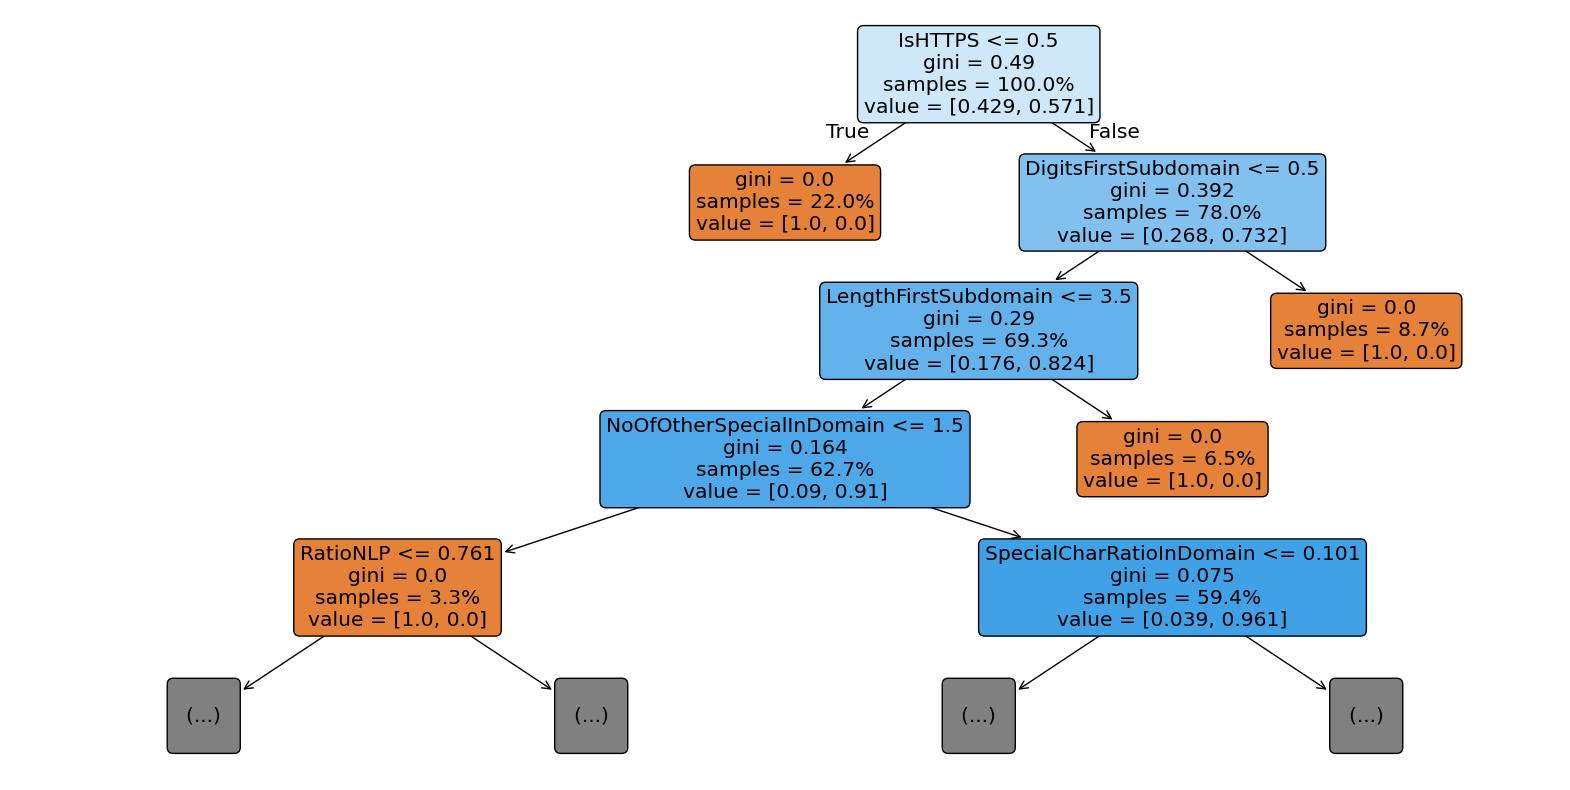

In [129]:
# Print tree graph
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=new_feats, filled=True, rounded=True, proportion=True, max_depth=4)
plt.show()

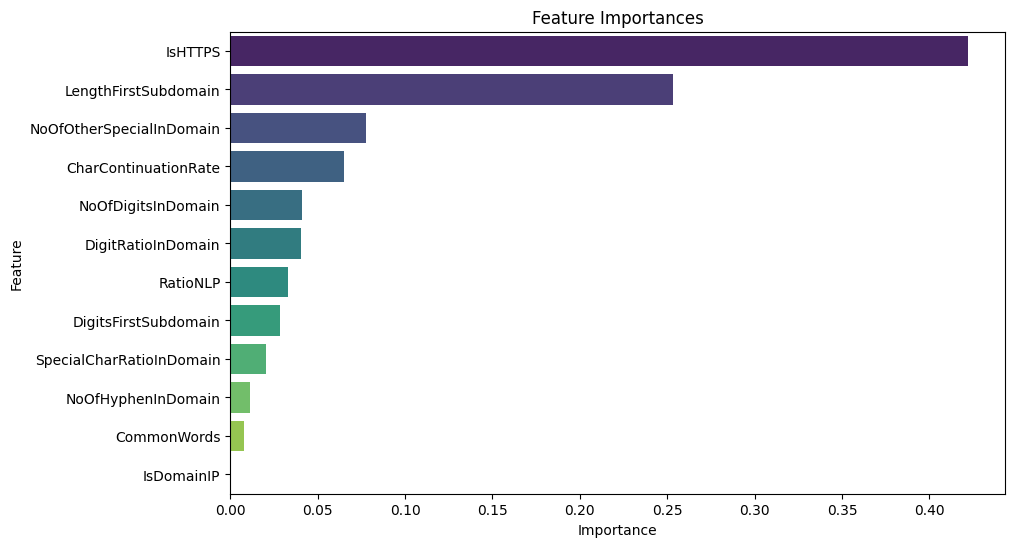

In [130]:
# Extract and plot feature importances with sns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame to store the feature importances
importances_df = pd.DataFrame({'Feature': new_feats, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance',y='Feature' ,hue='Feature', data=importances_df, palette='viridis', legend=False)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [133]:
# Store the false positives and false negatives
false_positives = test_data[(y_test == 0) & (y_pred_rf == 1)]
false_negatives = test_data[(y_test == 1) & (y_pred_rf == 0)]

# Print the head of the false positives
print("False Positives:")
print(false_positives.head(10)['Domain'])

# Print the head of the false negatives
print("\nFalse Negatives:")
print(false_negatives.head(10)['Domain'])


False Positives:
345851               www.paklap.pk
345852               www.paklap.pk
345867       www.boozyfoodie.co.za
345873          www.zahid-trec.com
345929        www.chinabitmain.com
345931              www.lyon.co.za
345957       www.antminersshop.com
345971         www.campusfuenn.com
345972           www.nordicdev.com
346013    www.siddhivinayakmep.com
Name: Domain, dtype: object

False Negatives:
4598             www.ashl-les4glace.stats.pointstreak.com
7405                       www.benarty2selea.multiply.com
7560                       www.best-free-web-tv.911mb.com
7735                               www.bfte.podomatic.com
9273    www.blog.moffittrestorativedentistry.com.php5-...
9615                                  www.blog.zap2it.com
9616                                  www.blog.zap2it.com
9617                                  www.blog.zap2it.com
9618                                  www.blog.zap2it.com
9619                                  www.blog.zap2it.com
Name: D

In [122]:
# Save the RF model
import joblib

# Save the model as a pickle file
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']